In [1]:
import customize_motif_vec
from glypy.io import glycoct
import extract_motif
from glypy.algorithms.subtree_search import subtree_of
import customize_motif_vec
import glycan_io
import extract_motif
import motif_class
import __init__
import json_utility
import glycan_profile
from importlib import reload
import pandas as pd
reload(__init__)
reload(extract_motif)
reload(motif_class)
reload(glycan_profile)
import seaborn as sns
import plot_glycan_utilities
reload(plot_glycan_utilities)
import matplotlib.pyplot as plt
from glypy.io import glycoct, iupac
import numpy as np

%matplotlib inline


In [2]:
reload(customize_motif_vec)
extract_motif.main()
customize_motif_vec.customizing_motif_vec_pip()
# abundance_data_table = json_utility.load_json("../generated_json_file/NBT_dict_name_abundance_cross_profile.json")
match_dict = json_utility.load_json(__init__.json_address + "match_dict.json")
# load glycoprofile Mass Spectrum m/z and glycan structure info
# load CHO paper abundance table
mz_abd_table = glycan_profile.load_cho_mz_abundance()
# load glycoprofile Mass Spectrum m/z and glycan structure info
profile_mz_to_id = glycan_profile.load_glycan_profile_dic()
# normalize CHO abundance table
norm_mz_abd_dict = glycan_profile.get_norm_mz_abd_table(mz_abd_table)

glycoprofile_list = glycan_profile.get_glycoprofile_list(profile_mz_to_id, norm_mz_abd_dict, match_dict)
# get table generator and generate existance table
table_generator = glycan_profile.MotifAbdTableGenerator(glycoprofile_list)
motif_existance_table = table_generator.table_existance()
# print(motif_existance_table.head())
# motif_abd_table.head()

# load motif vector and return edge_list
# motif_vector = json_utility.load_json("../generated_json_file/Unicarbkb_motif_vec_12259.json")
# motif_lib = gc_gl`ycan_motif.GlycanMotifLib(motif_dict)

nglycan_motif_lab = motif_class.MotifLabNGlycan(json_utility.load_json(__init__.merged_motif_dict_addr)) # unicarbkb_motifs_12259.json
motif_vec = nglycan_motif_lab.motif_vec
tree_type_dp, edge_list = nglycan_motif_lab.get_dependence_tree_ncore()
# hier_enrich_glycoprofile_occurence(glycoprofile, scoredMotifs_occurence_vector, np.array(edge_list),motif_vector)

There are  77 glycan id found;  77 glycans loaded
start parallel
closing poll
joining pool
10 0.8972752094268799
10 0.96675705909729
7 0.14525389671325684
11 1.8311591148376465
11 2.0068821907043457
11 1.8566079139709473
13 5.358821868896484
10 0.9782400131225586
14 7.828035831451416
8 0.3948349952697754
14 9.72871994972229
6 0.09296107292175293
14 8.861091136932373
11 2.0367698669433594
9 0.8830080032348633
15 14.452746152877808
16 17.849907875061035
14 10.102813005447388
14 8.885494947433472
9 0.6285920143127441
11 1.9181020259857178
16 21.695466995239258
13 6.68536901473999
15 16.481937885284424
12 3.6329190731048584
12 3.896973133087158
8 0.32555389404296875
14 10.229530096054077
16 23.703391075134277
9 0.5980420112609863
10 1.523494005203247
12 4.295335054397583
17 37.59001708030701
18 48.455965995788574
19 63.80359697341919
18 38.17040991783142
11 2.163972854614258
8 0.34046196937561035
13 6.618427038192749
17 31.919050931930542
14 9.924116134643555
11 2.141855001449585
16 22.892

# In degree, out degree, ttest, corr analysis

In [3]:
reload(motif_class)

_a = motif_class.NodesState(nglycan_motif_lab.motif_dep_tree_ncore, motif_class.get_weight_dict(table_generator.table_against_wt_relative_abd()))
_a.threshold=200
len(_a.motif_weight[1])
_a.get_node_value()
out_degree_list, in_degree_list = _a.get_edge_node_degree()
p_value_list = _a.get_edge_ttest_dis()
corr_list = _a.get_edge_corr_dis()
all_t = _a.get_edge_all_ttest()


In [4]:
from scipy import stats
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2))
a = stats.ttest_1samp(rvs,0.0)
type(a.pvalue)

numpy.ndarray

In [5]:
edge_table = pd.DataFrame({'out_d':out_degree_list, 'in_d':in_degree_list, 'p_value':p_value_list, 'correlation':corr_list})
edge_table.head()

correlation  in_d  out_d     p_value
0     0.985075     1      3  200.000000
1     0.977162     1      3   79.053975
2     0.054267     1      3  200.000000
3     0.954099     1      4   57.911922
4     0.807724     1      4   29.169660

# edges' p-value distribution

(51, 77)
[0.99999999999999978, 0.99999999999999978, 0.99999999999999967, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 1.0, 0.99999999999999978, 1.0, 0.99999999999999978, 1.0, 0.99999999999999978, 1.0, 0.99999999999999978, 1.0, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 1.0, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999978, 0.99999999999999967, 0.99999999999999978]
[1.0, 1.0, 0.99999999999999989, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99999999999999989, 1.0]
0.985074626866
0.985074626866


(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=1.83697019872e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x127a9f470>)

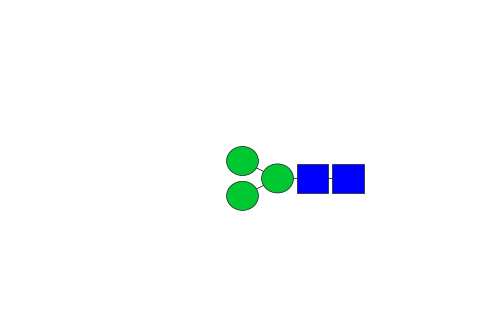

In [6]:
print(_a.edge[0])
print(_a.normalized_motif_weight[51])
print(_a.motif_weight[51])
print(_a.get_value_unnormed(51,77, _a.get_corr))
print(_a.get_value_normed(51,77, _a.get_corr))
plot_glycan_utilities.plot_glycan(motif_vec[51])


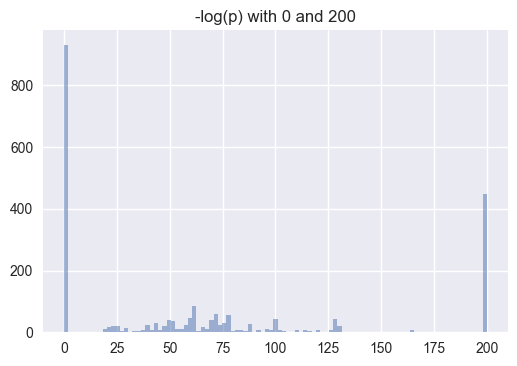

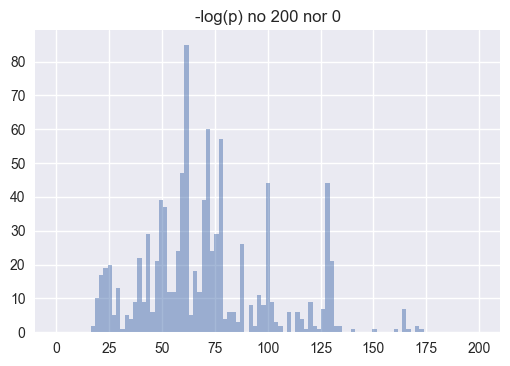

In [7]:
edge_mod = edge_table[edge_table.p_value < 200]
edge_mod = edge_mod[edge_mod.p_value>0]
edge_mod.head()

bins = np.linspace(0, 200, 100)
plt.hist(edge_table.p_value, bins, alpha=0.5)
# plt.hist(x_1, bins, alpha=0.5)
plt.title('-log(p) with 0 and 200')
plt.show()

plt.hist(edge_mod.p_value, bins, alpha=0.5)
# plt.hist(x_1, bins, alpha=0.5)
plt.title('-log(p) no 200 nor 0')
plt.show()

# _p = [np.exp(-i) for i in edge_mod.p_value]
# bins = np.linspace(0, 0.01, 100)
# plt.hist(_p,alpha=0.5)
# plt.show()

# _p = [np.exp(-i) for i in edge_mod.p_value]
# bins = np.linspace(0, 0.01, 100)


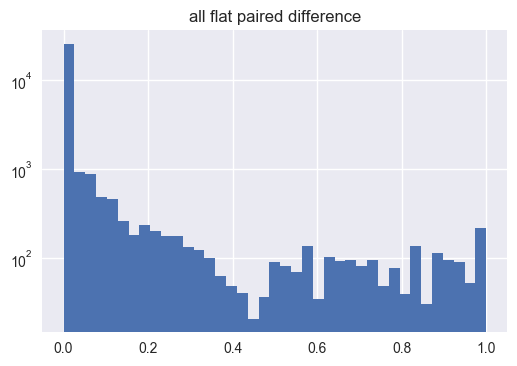

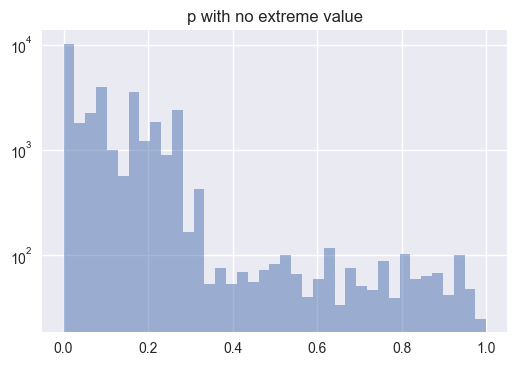

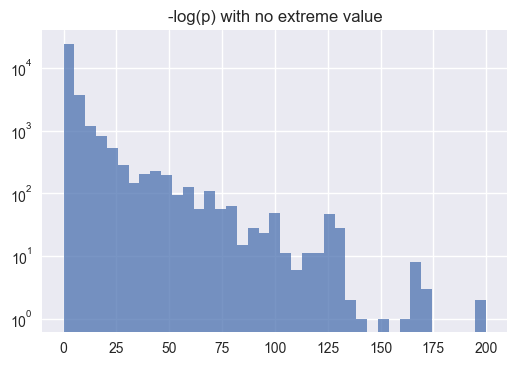

In [8]:
#
bins = np.linspace(0, 1, 40)
plt.hist(_a.flat_paired_diff, bins, alpha=1)
plt.yscale('log', nonposy='clip')
plt.title('all flat paired difference' )
plt.show()

bins = np.linspace(0, 1, 40)

_p = [np.exp(-i) for i in all_t]
plt.hist(_p, bins, alpha=0.5)
# plt.xscale('log', nonposx='clip')
plt.yscale('log', nonposy='clip')
plt.title('p with no extreme value')
plt.show()

bins = np.linspace(0, 200, 40)
plt.hist(all_t, bins, alpha=0.75)
plt.yscale('log', nonposy='clip')
plt.title('-log(p) with no extreme value')
plt.show()


# _list = []
# for i in _a.normalized_motif_weight:
#     _list.extend(_a.normalized_motif_weight[i])



# p=0, p=1  vs node's degree

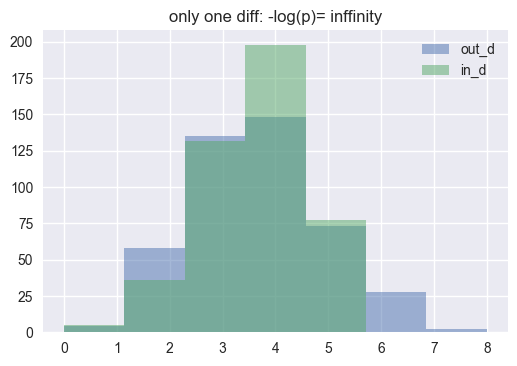

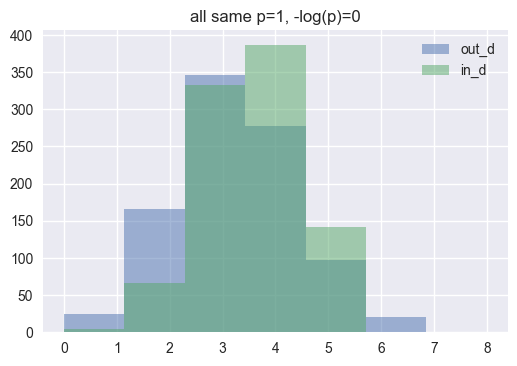

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
neg_log_p_200 = edge_table[edge_table.p_value==200]
neg_log_p_0 = edge_table[edge_table.p_value==0]
bins = np.linspace(0, 8, 8)
plt.hist(neg_log_p_200.out_d, bins, alpha=0.5)
plt.hist(neg_log_p_200.in_d, bins, alpha=0.5)
plt.legend(['out_d', 'in_d'])
plt.title('only one diff: -log(p)= inffinity')
plt.show()
plt.hist(neg_log_p_0.out_d, bins, alpha=0.5)
plt.hist(neg_log_p_0.in_d, bins, alpha=0.5)
plt.title('all same p=1, -log(p)=0')
plt.legend(['out_d', 'in_d'])
plt.show()
_temp_out_list = []
_temp_in_list = []
p_larger5 = edge_table[edge_table.out_d>5]
for i in edge_table[edge_table.out_d>5].index.tolist():
    _temp_out_list.append(_a.edge[i][0])
    _temp_in_list.append(_a.edge[i][1])
p_larger5['out_node'] = _temp_out_list
p_larger5['in_node'] = _temp_in_list

# p_larger5
# plot_glycan_utilities.plot_glycan(motif_vec[1065])

# p!=1

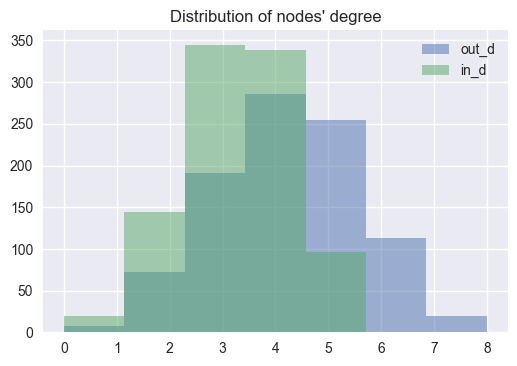

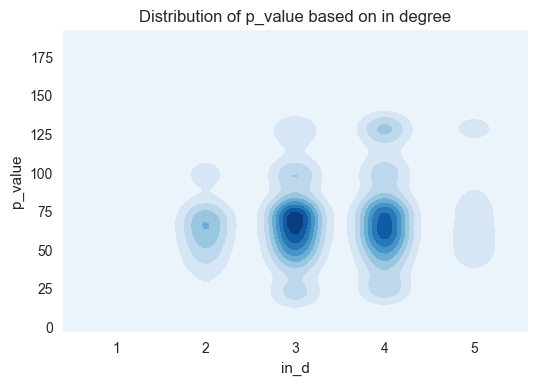

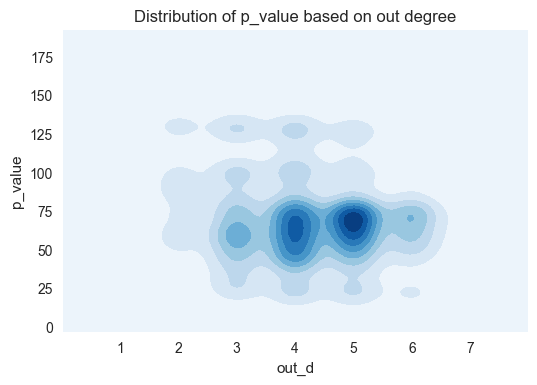

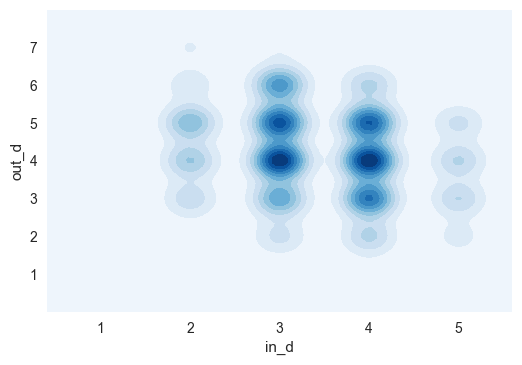

In [10]:

bins = np.linspace(0, 8, 8)
plt.hist(edge_mod.out_d, bins, alpha=0.5)
plt.hist(edge_mod.in_d, bins, alpha=0.5)
plt.legend(['out_d', 'in_d'])
plt.title("Distribution of nodes' degree")
plt.show()
# in_degree_list
out_degree_list, in_degree_list = _a.get_edge_node_degree()
# print(out_degree_list, in_degree_list)
# plt.plot(out_degree_list, )
# library & dataset
import seaborn as sns

# Basic 2D density plot
# sns.set_style("white")
sns.kdeplot(edge_mod.in_d, edge_mod.p_value, cmap="Blues", shade=True, shade_lowest=True,)
# sns.jointplot(x=p_mod.in_d, y=p_mod.p_value, kind='kde', color="skyblue")
plt.title("Distribution of p_value based on in degree")
plt.show()

# Custom it with the same argument as 1D density plot
sns.kdeplot(edge_mod.out_d, edge_mod.p_value, cmap="Blues", shade=True, shade_lowest=True,)
# sns.jointplot(x=p_mod.out_d, y=p_mod.p_value, kind='kde', color="skyblue")
plt.title("Distribution of p_value based on out degree")

plt.show()
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(edge_mod.in_d, edge_mod.out_d, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()


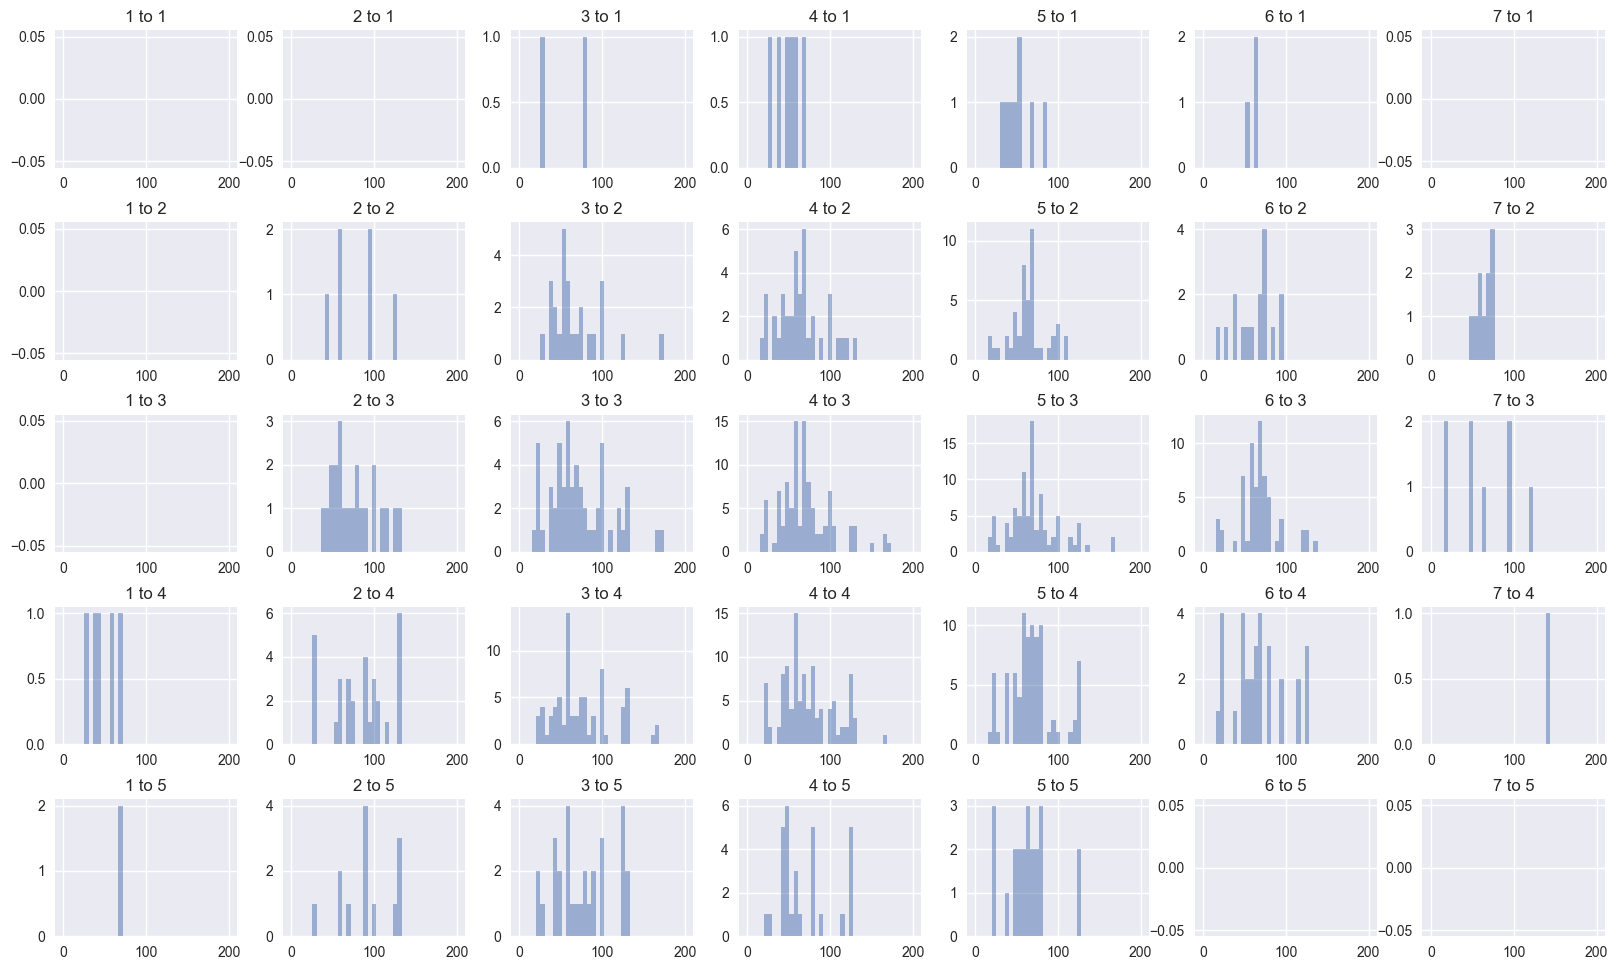

In [11]:

fig, axes = plt.subplots(5, 7, squeeze=True)
plt.title('p_value distribution')
fig.set_size_inches(20, 12)

for i in range(1,8):
    for j in range(1,6):
#         _str = "68"+str()
#         plt.subplot()
        temp_table = edge_table[edge_table.in_d == j]
        temp_table = temp_table[temp_table.out_d == i]
        temp_table = temp_table[temp_table.p_value > 0]
        temp_table = temp_table[temp_table.p_value < 200]

        bins = np.linspace(0, 200, 40)
        
        axes[j-1,i-1].hist(temp_table.p_value, bins, alpha=0.5)
#         axes[j-1,i-1].hist(temp_table.p_value, bins, alpha=0.5)
#         axes[j-1,i-1].legend(, 'in_d'])
        axes[j-1,i-1].set_title(str(i)+" to "+str(j))
# sns.jointplot(x=p_mod.in_d, y=p_mod.out_d, kind='kde', color="skyblue")
plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.show()

# Edges’ Correlation vs TTest

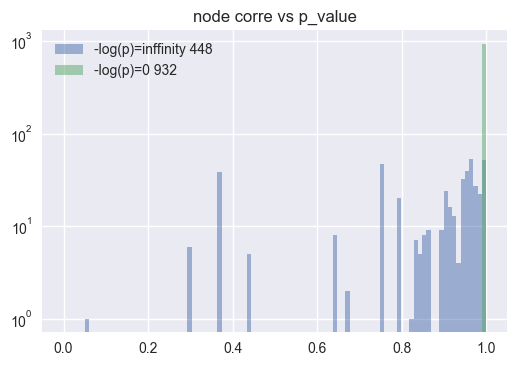

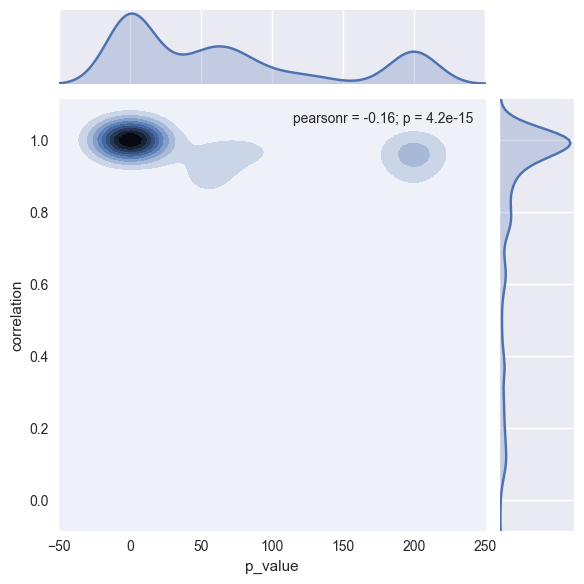

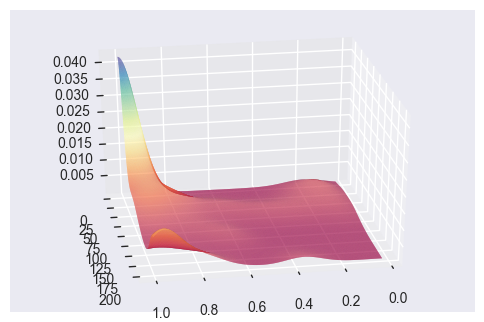

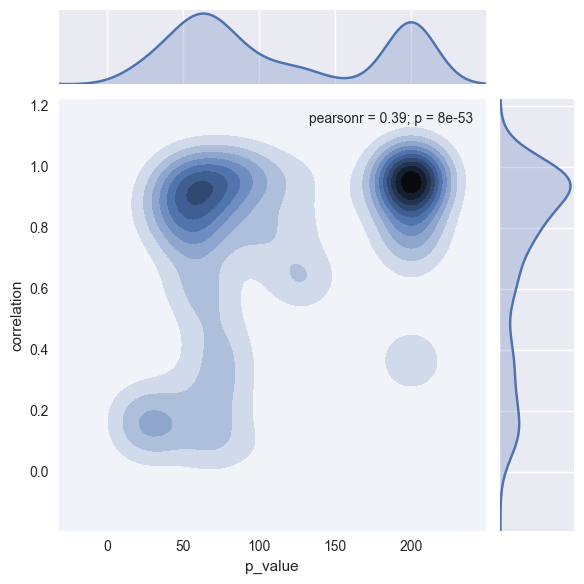

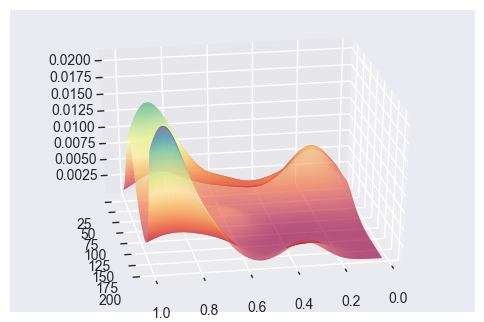

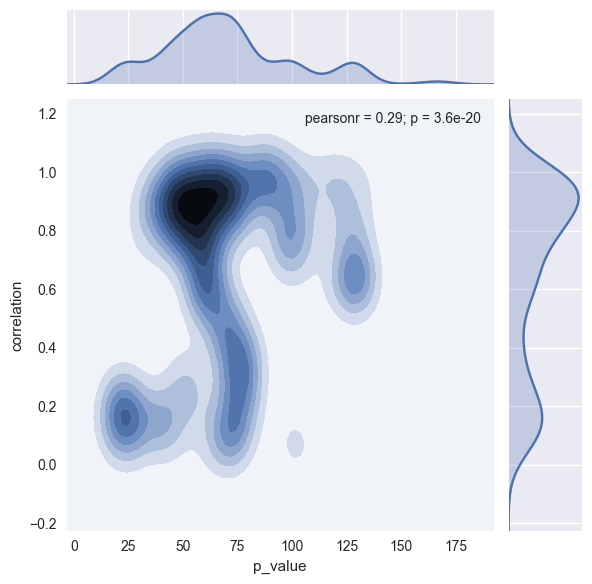

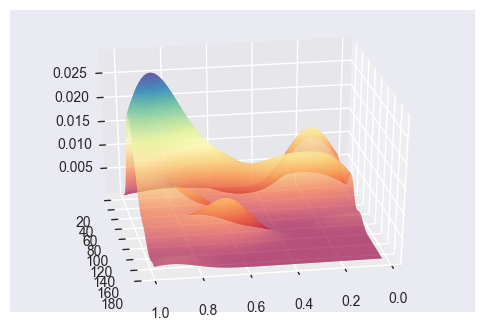

In [14]:
bins = np.linspace(0, 1, 100)
plt.hist(neg_log_p_200.correlation, bins, alpha=0.5, )
plt.hist(neg_log_p_0.correlation, bins, alpha=0.5, )
plt.yscale('log', nonposy='clip')
plt.title('node corre vs p_value')
plt.legend(['-log(p)=inffinity '+str(len(neg_log_p_200.correlation)), '-log(p)=0 '+str(len(neg_log_p_0.correlation))])
# sns.kdeplot(neg_log_p_200.p_value, neg_log_p_200.correlation, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()

# sns.kdeplot(edge_table.p_value, edge_table.correlation, cmap="Blues", shade=True, shade_lowest=True, title = 'all')
sns.jointplot(edge_table.p_value, edge_table.correlation, kind='kde')
draw_3d(edge_table)

plt.show()
edge_mod = edge_table[edge_table.p_value >0]
# sns.kdeplot(edge_no_same.p_value, edge_no_same.correlation, cmap="Blues", shade=True, shade_lowest=True, )
sns.jointplot(edge_mod.p_value, edge_mod.correlation, kind='kde')
plt.show()
draw_3d(edge_mod)

edge_mod = edge_mod[edge_mod.p_value <200]

sns.jointplot(edge_mod.p_value, edge_mod.correlation, kind='kde')
# sns.kdeplot(edge_mod.p_value, edge_mod.correlation, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()
draw_3d(edge_mod)


# neg_log_p_200 = edge_table[edge_table.p_value==200]
# neg_log_p_0 = edge_table[edge_table.p_value==0]
# print(neg_log_p_200)

# sns.kdeplot(neg_log_p_0.p_value, neg_log_p_0.correlation, cmap="Blues", shade=True, shade_lowest=True, )
# plt.show()


# node's correlation

In [74]:
reload(motif_class)

_a = motif_class.NodesState(nglycan_motif_lab.motif_dep_tree_ncore, motif_class.get_weight_dict(table_generator.table_against_wt_relative_abd()))
node_mean, node_var = _a.get_node_sta()
node_corr, node_pvalue =_a.get_node_value()
# node_pvalue =_a.get_node_value(method='one_vs_rest_t')

# print(np.random.normal(0.0000, 0.001, len(node_corr)))
# for i,j in enumerate(np.random.normal(0.000, 0.0001, len(node_corr))):
#     node_corr[i]+=j
node_table = pd.DataFrame({'node':_a.nodes, 'node_mean':node_mean, 'node_var':node_var, 'out_d':_a._out_degree_list, 'in_d':_a._in_degree_list, 'p_value':node_pvalue, 'correlation':node_corr})
node_table.head()
# print(len(node_corr), len(node_pvalue), len(_a._out_degree_list), len(_a._in_degree_list))
# node_table=node_table[node_table.p_value>-1]
node_table.head()

correlation  in_d  node  node_mean      node_var  out_d     p_value
0    -1.000000     0    51   1.000000  9.425728e-33      3   -1.000000
1     0.985075     1    77   0.970588  2.854671e-02      4  200.000000
2     0.977162     1    84   0.955345  3.531812e-02      2   79.053975
3     0.057143     1    92   0.029412  2.854671e-02      2  200.000000
4     0.954099     1   104   0.885398  6.764225e-02      5   57.911922

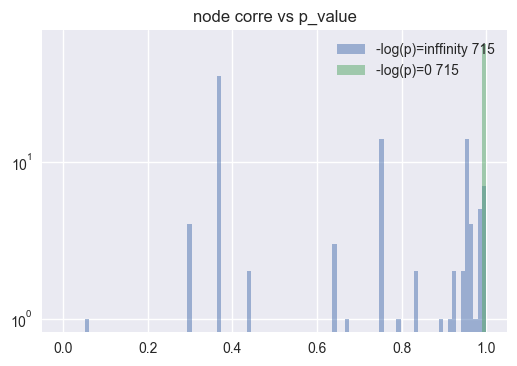

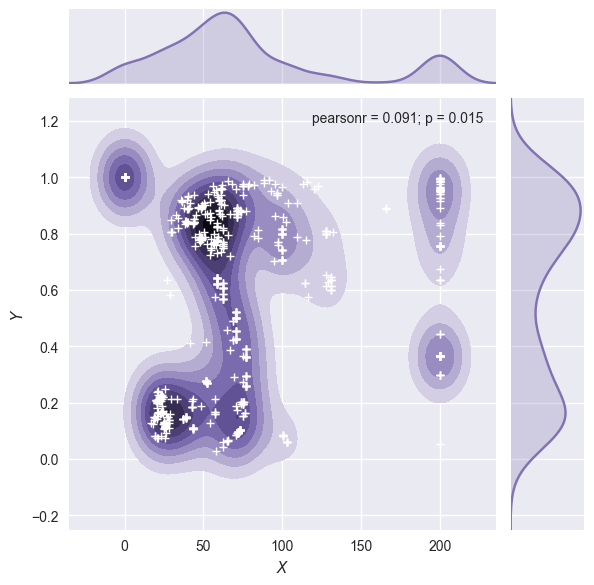

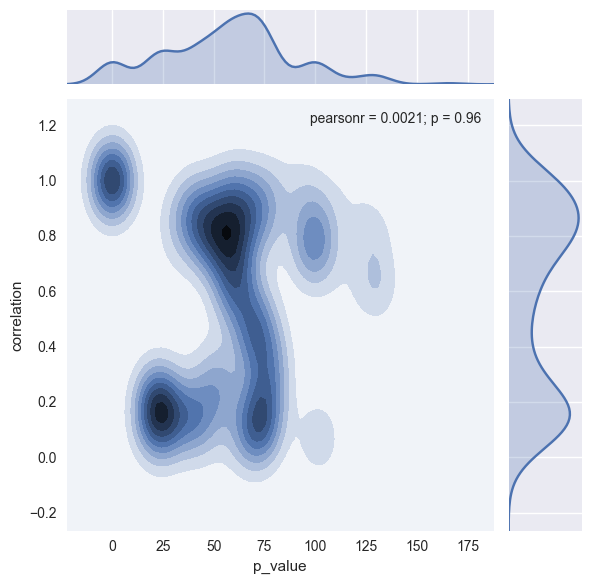

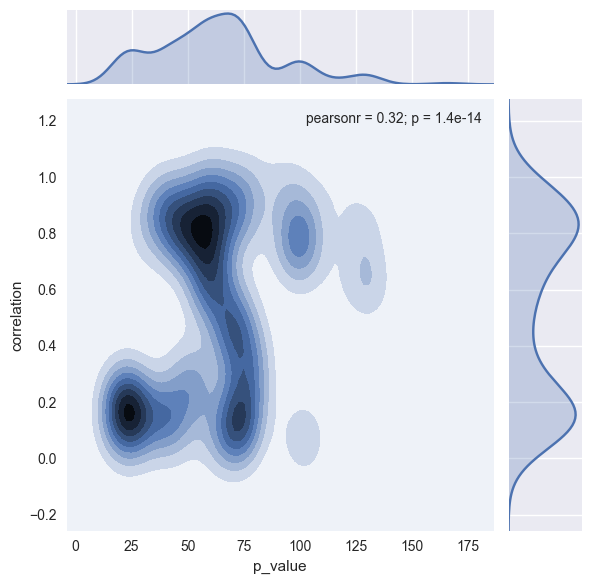

In [31]:
bins = np.linspace(0, 1, 100)
plt.hist(node_table[node_table.p_value==200].correlation, bins, alpha=0.5, )
plt.hist(node_table[node_table.p_value==0].correlation, bins, alpha=0.5, )
# plt.hist(node_table.correlation, bins, alpha=0.5, )
plt.yscale('log', nonposy='clip')
plt.title('node corre vs p_value')
plt.legend(['-log(p)=inffinity '+str(len(node_table.correlation)), '-log(p)=0 '+str(len(node_table.correlation))])
plt.show()

# sns.kdeplot(node_table.p_value, node_table.correlation, cmap="Blues", shade=True, shade_lowest=True, title = 'all')
# sns.jointplot(node_table.p_value, node_table.correlation, ratio=3, kind='hex', xlim=(-50,250), ylim=(0.85,1.05))
# plt.show()
g = sns.jointplot(node_table.p_value, node_table.correlation, kind="kde", color="m", )#xlim=(-50,250), ylim=(0.85,1.05)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");
plt.show()

node_p_mod = node_table[node_table.p_value<200]
# node_p_mod = node_p_mod[node_p_mod.p_value]
# sns.kdeplot(node_p_mod.p_value, node_p_mod.correlation, cmap="Blues", shade=True, shade_lowest=True, )
sns.jointplot(node_p_mod.p_value, node_p_mod.correlation, kind='kde', )#xlim=(-50,250), ylim=(0.85,1.05)
plt.show()
node_p_mod=node_p_mod[node_p_mod.p_value>0]
sns.jointplot(node_p_mod.p_value, node_p_mod.correlation, kind='kde', )#xlim=(-50,250), ylim=(0.85,1.05)
# sns.kdeplot(node_p_mod.p_value, node_p_mod.correlation, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()

In [20]:
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
def draw_3d(node_table):
    nbins=300
    k = kde.gaussian_kde([node_table.correlation,node_table.p_value])
    xi, yi = np.mgrid[node_table.correlation.min():node_table.correlation.max():nbins*1j, node_table.p_value.min():node_table.p_value.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    # Transform it in a dataframe
    data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })

    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
    # Adapt angle, first number is up/down, second number is right/left
    ax.view_init(30, 80)



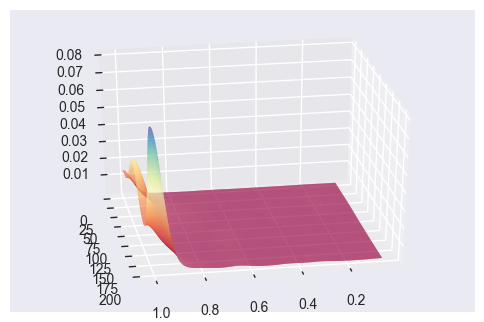

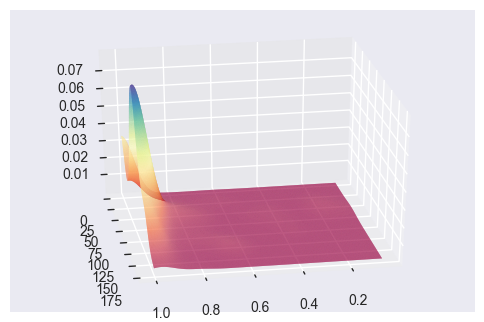

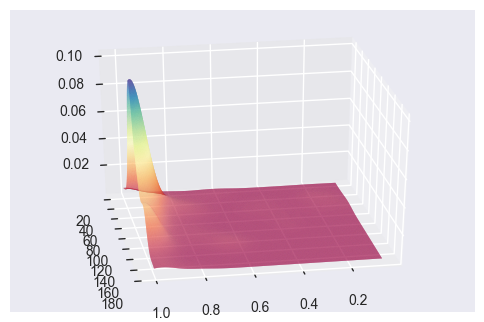

In [21]:
draw_3d(node_table)

node_p_mod = node_table[node_table.p_value<200]
# node_p_mod = node_p_mod[node_p_mod.p_value]
# sns.kdeplot(node_p_mod.p_value, node_p_mod.correlation, cmap="Blues", shade=True, shade_lowest=True, )
# sns.jointplot(node_p_mod.p_value, node_p_mod.correlation, kind='kde', xlim=(-50,250), ylim=(0.85,1.05))
# plt.show()
draw_3d(node_p_mod)
node_p_mod=node_p_mod[node_p_mod.p_value>0]
# sns.jointplot(node_p_mod.p_value, node_p_mod.correlation, kind='kde', xlim=(-50,250), ylim=(0.85,1.05))
# sns.kdeplot(node_p_mod.p_value, node_p_mod.correlation, cmap="Blues", shade=True, shade_lowest=True, )
# plt.show()
draw_3d(node_p_mod)


In [29]:
node_table[node_table.correlation>0.995][node_table.p_value>199].shape

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(299, 4)

# Nodes dropping

In [227]:
# print(node_table[node_table.correlation==1][node_table.p_value>199].shape)
# print(node_table[node_table.correlation>0.995].shape)
reload(motif_class)
_a = motif_class.NodesState(nglycan_motif_lab.motif_dep_tree_ncore, motif_class.get_weight_dict(table_generator.table_against_wt_relative_abd()))
node_attri = {}
edge_attri = {}
for i in _a.nodes:
    node_attri[i] = {'kept':'N'}
    if i in mod_nodes:
        node_attri[i]['kept'] = 'Y'
        
for i,j in _a.edges:
    if i not in edge_attri.keys():
        edge_attri[i] = {j:{'kept':'N'}}
    else:
        edge_attri[i][j] = {'kept':'N'}
corr_list = _a.get_edge_corr_dis()
dep_count = {}
dropping_list = []
for index, pair in enumerate(sorted(_a.edges, key=lambda x: x[0])):
    i,j = pair
    if corr_list[index] > 0.9999:
        edge_attri[i][j]['kept']='Dep'
        node_attri[i]['kept'] = 'Dep'
        dropping_list.append(i)
        if i not in dep_count.keys():
            dep_count[i] = [j]
        else:
            dep_count[i].append(j)
print('_a.nodes', len(_a.nodes))
# generate dep_tree weights' 
merged_weights_dict = dict(zip(_a.nodes, [1]*len(_a.nodes)))
print('merged_weights_dict', len(merged_weights_dict))
for i in sorted(list(dep_count.keys())):
    _counts = len(dep_count[i])
    for j in dep_count[i]:    
        merged_weights_dict[j] += merged_weights_dict[i]/_counts
    merged_weights_dict[i]=0
_weights = [merged_weights_dict[x] for x in merged_weights_dict.keys()]
_weights = [x for x in _weights if x > 0.1]
print(len(set(dropping_list)), "+", len(_weights), "= 722", sum(_weights))

        
print('dropping_list', len(set(dropping_list)))
dropping_list = list(set(dropping_list))
kept_nodes_list = [x for x in _a.nodes if x not in dropping_list]
    
for i in range(len(kept_nodes_list)):
    for j in range(i, len(kept_nodes_list)):
        if j==i:continue
        if _a.get_value_unnormed(kept_nodes_list[i],kept_nodes_list[j],_a.get_corr) > 0.9999:
            node_attri[j]['kept'] = 'DepSame'
            print('drop same level', kept_nodes_list[i], kept_nodes_list[j])
            dropping_list.append(kept_nodes_list[i])
print('dropping_list', len(set(dropping_list)))  
_weights = [merged_weights_dict[x] for x in merged_weights_dict.keys()]
_weights = [x for x in _weights if x > 0.1]
print(len(set(dropping_list)), "+", len(_weights), "= 722", sum(_weights))

#########################
mod_edges = _a.edges
mod_nodes = [x for x in _a.nodes if x not in dropping_list]
for i in sorted(list(dropping_list)):
    mod_edges = [x for x in mod_edges if i not in x]
    
def get_edges_from_edges_list(node, edges, relative="parents"):
    relative_list = []
    if relative=='parents':
        for i,j in edges:
            if i == node:
                relative_list.append(j)
    elif relative=='children':
        for i,j in edges:
            if j == node:
                relative_list.append(i)
    else: 
        assert ValueError, 'No such parameter, parents or children'
    return relative_list
print(len(mod_edges),len(mod_nodes))

mod_out_degree, mod_in_degree = _a.get_nodes_degree(mod_edges)
mod_out_degree_list = [mod_out_degree[x] for x in mod_nodes]
mod_in_degree_list = [mod_in_degree[x] for x in mod_nodes]
dropped_nodes_table_all = node_table[node_table.node.isin(mod_nodes)]
dropped_nodes_table_all['in_d'] = mod_in_degree_list
dropped_nodes_table_all['out_d'] = mod_out_degree_list
# print(mod_in_degree_list,mod_out_degree_list)
# print(dropped_nodes_table_all.head())
# plt.hist(dropped_nodes_table_all.in_d, alpha=0.5, )
# plt.hist(dropped_nodes_table_all.out_d, alpha=0.5, )
# plt.legend(['in', 'out'])
# plt.show()
dropped_nodes_table = dropped_nodes_table_all[dropped_nodes_table_all.out_d<3]
_temp_dropping_list = [x for x in dropped_nodes_table_all.node.tolist() if x not in dropped_nodes_table.node.tolist()]
print('_temp_dropping_list', len(set(_temp_dropping_list)))

# print(_temp_dropping_list)
import scipy
_count = 0
nodes_dropped_by_out_degree = []
for i in _temp_dropping_list:
    _children_list = get_edges_from_edges_list(i, mod_edges)
    _motif_abd_list = []
    for j in _children_list:
        _motif_abd_list.extend(_a.motif_weight[j])
    _z, _p = scipy.stats.ttest_ind(_a.motif_weight[i], _motif_abd_list, equal_var=False)
#     print(_a.motif_weight[i], _motif_abd_list)
#     plot_glycan_utilities.plot_glycan(motif_vec[i], title=str(_p/2))
    if _p/2 > 0.1:
        _count+=1
        nodes_dropped_by_out_degree.append(i)
        _child_counts = len(_children_list)
        node_attri[i]['kept'] = 'TTest'
        for j in _children_list:    
            merged_weights_dict[j] += merged_weights_dict[i]/_child_counts
            edge_attri[i][j]['kept'] = 'TTest'
        merged_weights_dict[i]=0
_weights = [merged_weights_dict[x] for x in merged_weights_dict.keys()]
for i in dropping_list:
    if merged_weights_dict[i]>0:
        print("?",i,merged_weights_dict[i])
_weights = [x for x in _weights if x > 0.1]

print('_temp_dropping_list',len(set(_temp_dropping_list)),_count)
dropping_list.extend(nodes_dropped_by_out_degree)
print(len(set(dropping_list)), "+", len(_weights), "= 722", sum(_weights))



mod_nodes=[x for x in _a.nodes if x not in dropping_list]
mod_edges = _a.edges
for i in sorted(list(dropping_list)):
    mod_edges = [x for x in mod_edges if i not in x]
print('len nodes', len(mod_nodes), len(mod_edges))
# _value = 
# print(len(_weights), sum(_weights))
# print(_weights)
# dropped_nodes_table_all
#     print(_p/2)
    
    
## set nodes weight


_a.nodes 722
merged_weights_dict 722
537 + 185 = 722 722.0
dropping_list 537
dropping_list 537
537 + 185 = 722 722.0
370 185
_temp_dropping_list 61
_temp_dropping_list 61 43
580 + 142 = 722 722.0
len nodes 142 194


In [137]:
# merged_weights_dict = dict(zip(_a.nodes, [1]*len(_a.nodes)))



251 722.0000000000001


# network

In [229]:
import ndex 
from ndex.networkn import NdexGraph
import networkx as nx
# G=NdexGraph(server='http://ndexbio.org',uuid='5514aa50-3bbf-11e8-8695-0ac135e8bacf',username='bobao@ucsd.edu',password='37~bO^#1D3')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# #     else:
        
# for i,j in _a.edges:
#     if i not in edge_attri.keys():
#         edge_attri[i] = {j:{'kept':'N'}}
#     else:
#         edge_attri[i][j] = {'kept':'N'}
        
for i,j in mod_edges:
    edge_attri[i][j]['kept'] = 'Y'
    
def upload_network(edges, nodes, edge_attri, node_attri):
    node_list = nodes
    edge_list = edges
    # G=nx.Graph(G)
    # dG=nx.relabel_nodes(G, nx.get_node_attributes(G,'name'), copy=True)

    # nx.draw(dG, with_labels=True)
    # # G=NdexGraph()
    # id2name_map=dict(zip(range(len(dG.nodes())), dG.nodes()))
    # name2id_map={v:k for k,v in id2name_map.items()}
    # dG=nx.relabel_nodes(dG, name2id_map)
    # nx.set_node_attributes(dG,'names', id2name_map)
    G=NdexGraph()
    for i in node_list:
        G.add_node(i,name=str(i),attr_dict=node_attri[i])
    for ind, pair in enumerate(edge_list):
        i,j = pair
        G.add_edge(i,j, attr_dict=edge_attri[i][j], key=ind)
    G.upload_to(server='http://ndexbio.org',username='bobao@ucsd.edu',password='37~bO^#1D3')
    # help(G.upload_to)
    
upload_network(_a.edges, _a.nodes, edge_attri, node_attri)

In [223]:
help(nx.Graph.add_node)

Help on function add_node in module networkx.classes.graph:

add_node(self, n, attr_dict=None, **attr)
    Add a single node n and update node attributes.
    
    Parameters
    ----------
    n : node
        A node can be any hashable Python object except None.
    attr_dict : dictionary, optional (default= no attributes)
        Dictionary of node attributes.  Key/value pairs will
        update existing data associated with the node.
    attr : keyword arguments, optional
        Set or change attributes using key=value.
    
    See Also
    --------
    add_nodes_from
    
    Examples
    --------
    >>> G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
    >>> G.add_node(1)
    >>> G.add_node('Hello')
    >>> K3 = nx.Graph([(0,1),(1,2),(2,0)])
    >>> G.add_node(K3)
    >>> G.number_of_nodes()
    3
    
    Use keywords set/change node attributes:
    
    >>> G.add_node(1,size=10)
    >>> G.add_node(3,weight=0.4,UTM=('13S',382871,3972649))
    
    Notes
    ----

In [217]:
_list = [213, 287, 301, 303, 344, 403, 416, 451, 452, 454, 546, 548, 550, 585, 587, 588, 589, 713, 714, 722, 724, 746, 748, 750, 908, 909, 910, 927, 928, 930, 932, 1109, 1110, 1111, 1119, 1120, 1121, 1122, 1296, 1301, 1302, 1303, 1455, 1479, 1640]
# plot_glycan_utilities.plot_glycan_list([motif_vec[i] for i in _list],_list)

In [218]:
# dropped_nodes_table[dropped_nodes_table.node.isin([213, 287, 301, 303, 344, 399, 401, 403, 416, 451, 452, 454, 545, 546, 548, 550, 585, 587, 588, 589, 713, 714, 721, 722, 724, 745, 746, 748, 750, 908, 909, 910, 914, 927, 928, 929, 930, 932, 1109, 1110, 1111, 1119, 1120, 1121, 1122, 1296, 1301, 1302, 1303, 1455, 1479, 1640])]

[84, 120]
[77]
[104, 167]
[115, 168]
[151, 216, 232, 316]
[149, 214, 256, 288, 343, 400, 450, 586]
[213, 287, 301, 303, 344, 399, 401, 403, 416, 451, 452, 454, 545, 546, 548, 550, 585, 587, 588, 589, 713, 714, 721, 722, 724, 745, 746, 748, 750, 908, 909, 910, 914, 927, 928, 929, 930, 932, 1109, 1110, 1111, 1119, 1120, 1121, 1122, 1296, 1301, 1302, 1303, 1455, 1479, 1640]
[1477, 1478, 1578, 1579, 1643, 1644, 1679]
[1324, 1325, 1465, 1466, 1571, 1572, 1641]
[227, 304, 341, 415, 447, 556, 577, 726, 739, 924]
[114, 163, 184, 254]
[150, 212, 215, 217, 249, 300, 302, 328, 335, 336, 414, 438, 439, 571]
[1584, 1695]
[1647, 1700]
[51]
[663, 1398, 1617]
[827, 1520, 1667]
[729, 915, 923, 1118, 1158, 1251, 1326, 1407, 1535, 1618]
[1692, 1699]
[422, 558, 1098]
[173, 231, 237, 314]
[332, 351, 440, 487, 500, 604, 606, 641, 752, 814, 816, 986]
[599, 600, 751, 810, 811, 963, 966, 985, 1134, 1135, 1165, 1166, 1305, 1327, 1329, 1467]
[322, 426, 430, 563, 575, 740, 800, 982]
[920, 1298, 1568]
[92, 136, 202]

In [77]:
dropped_nodes_table.shape


(102, 5)

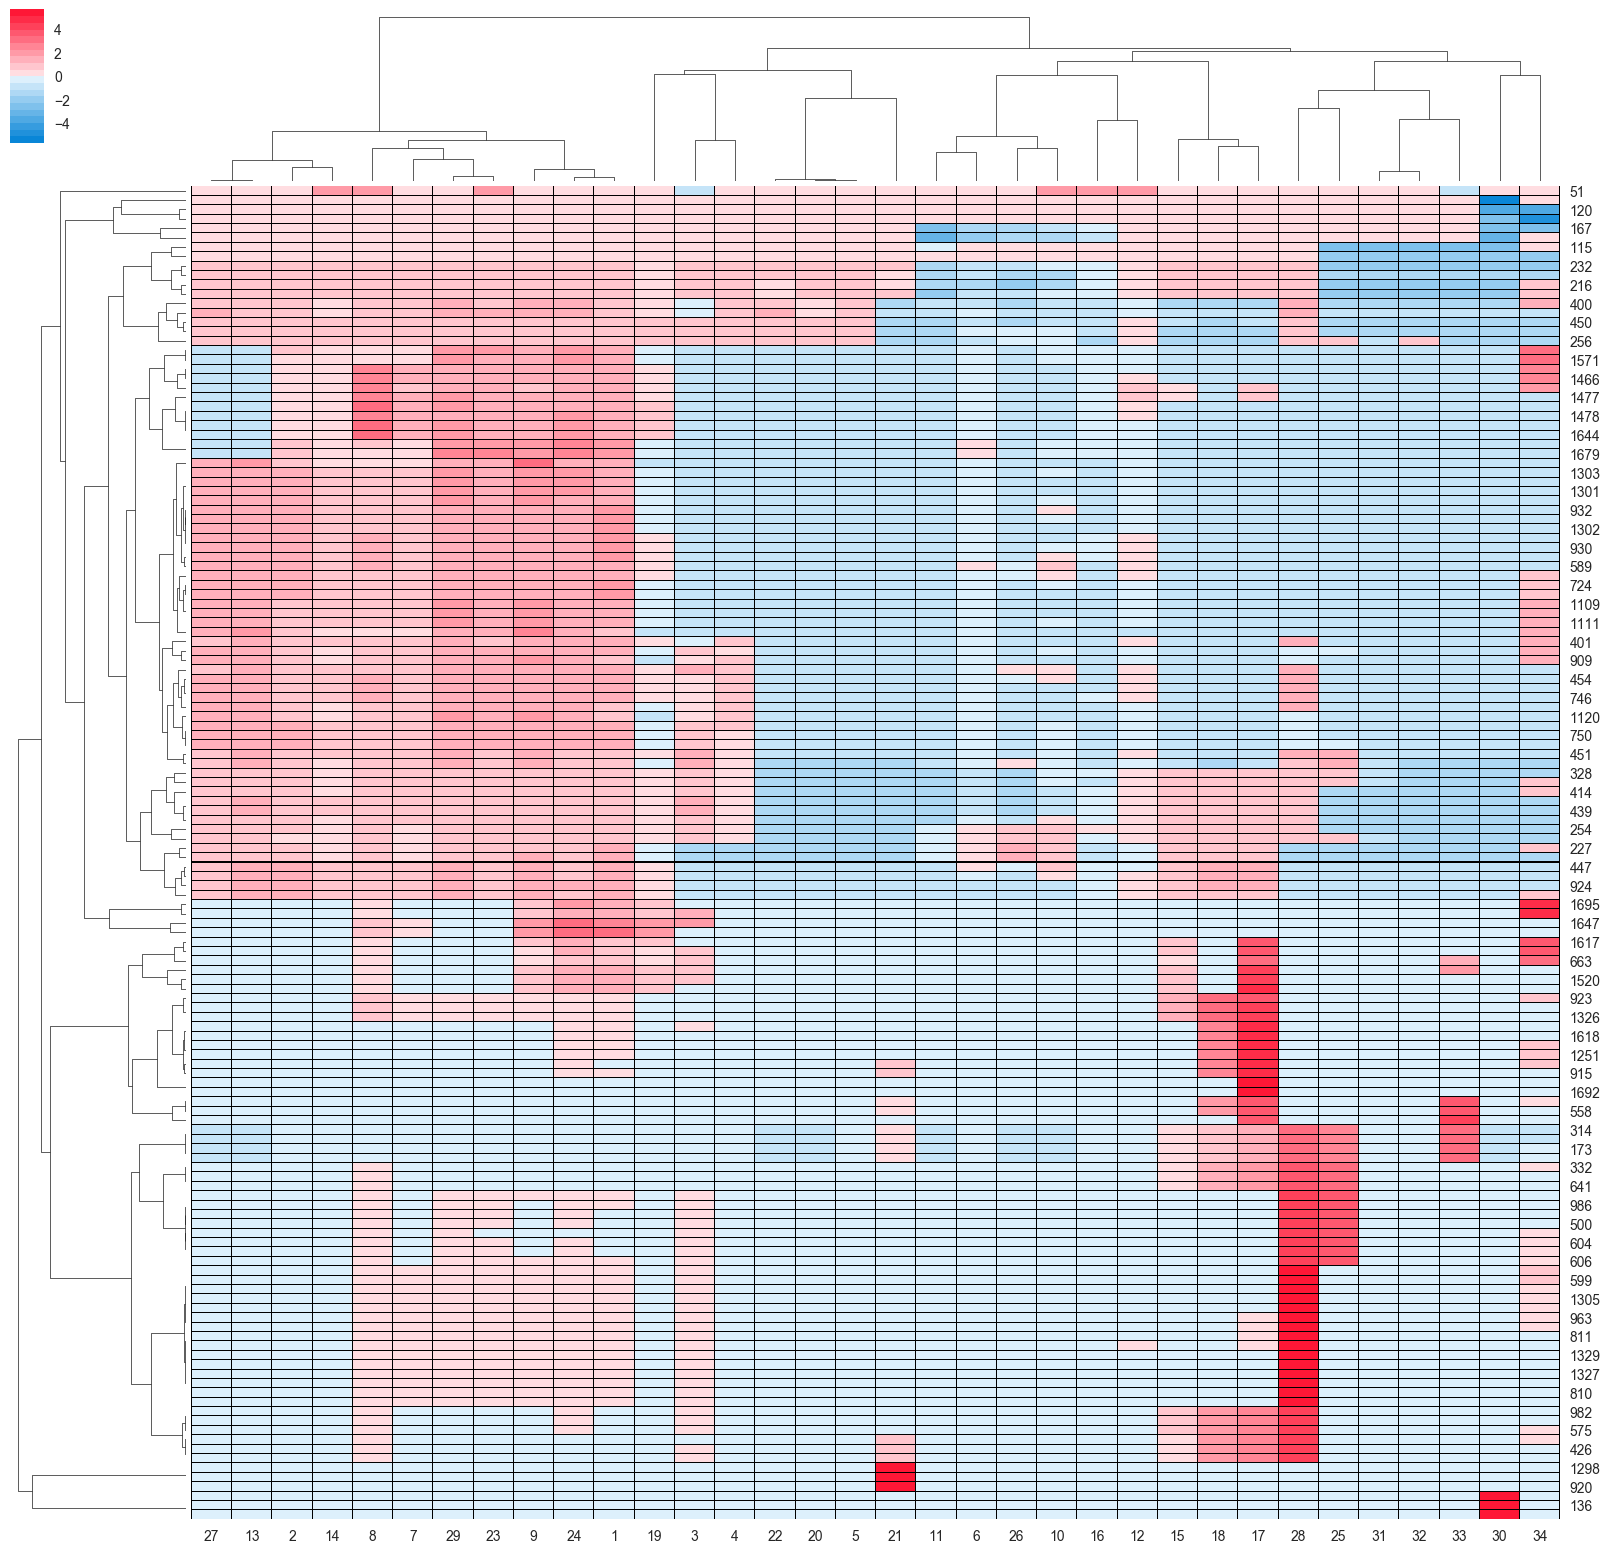

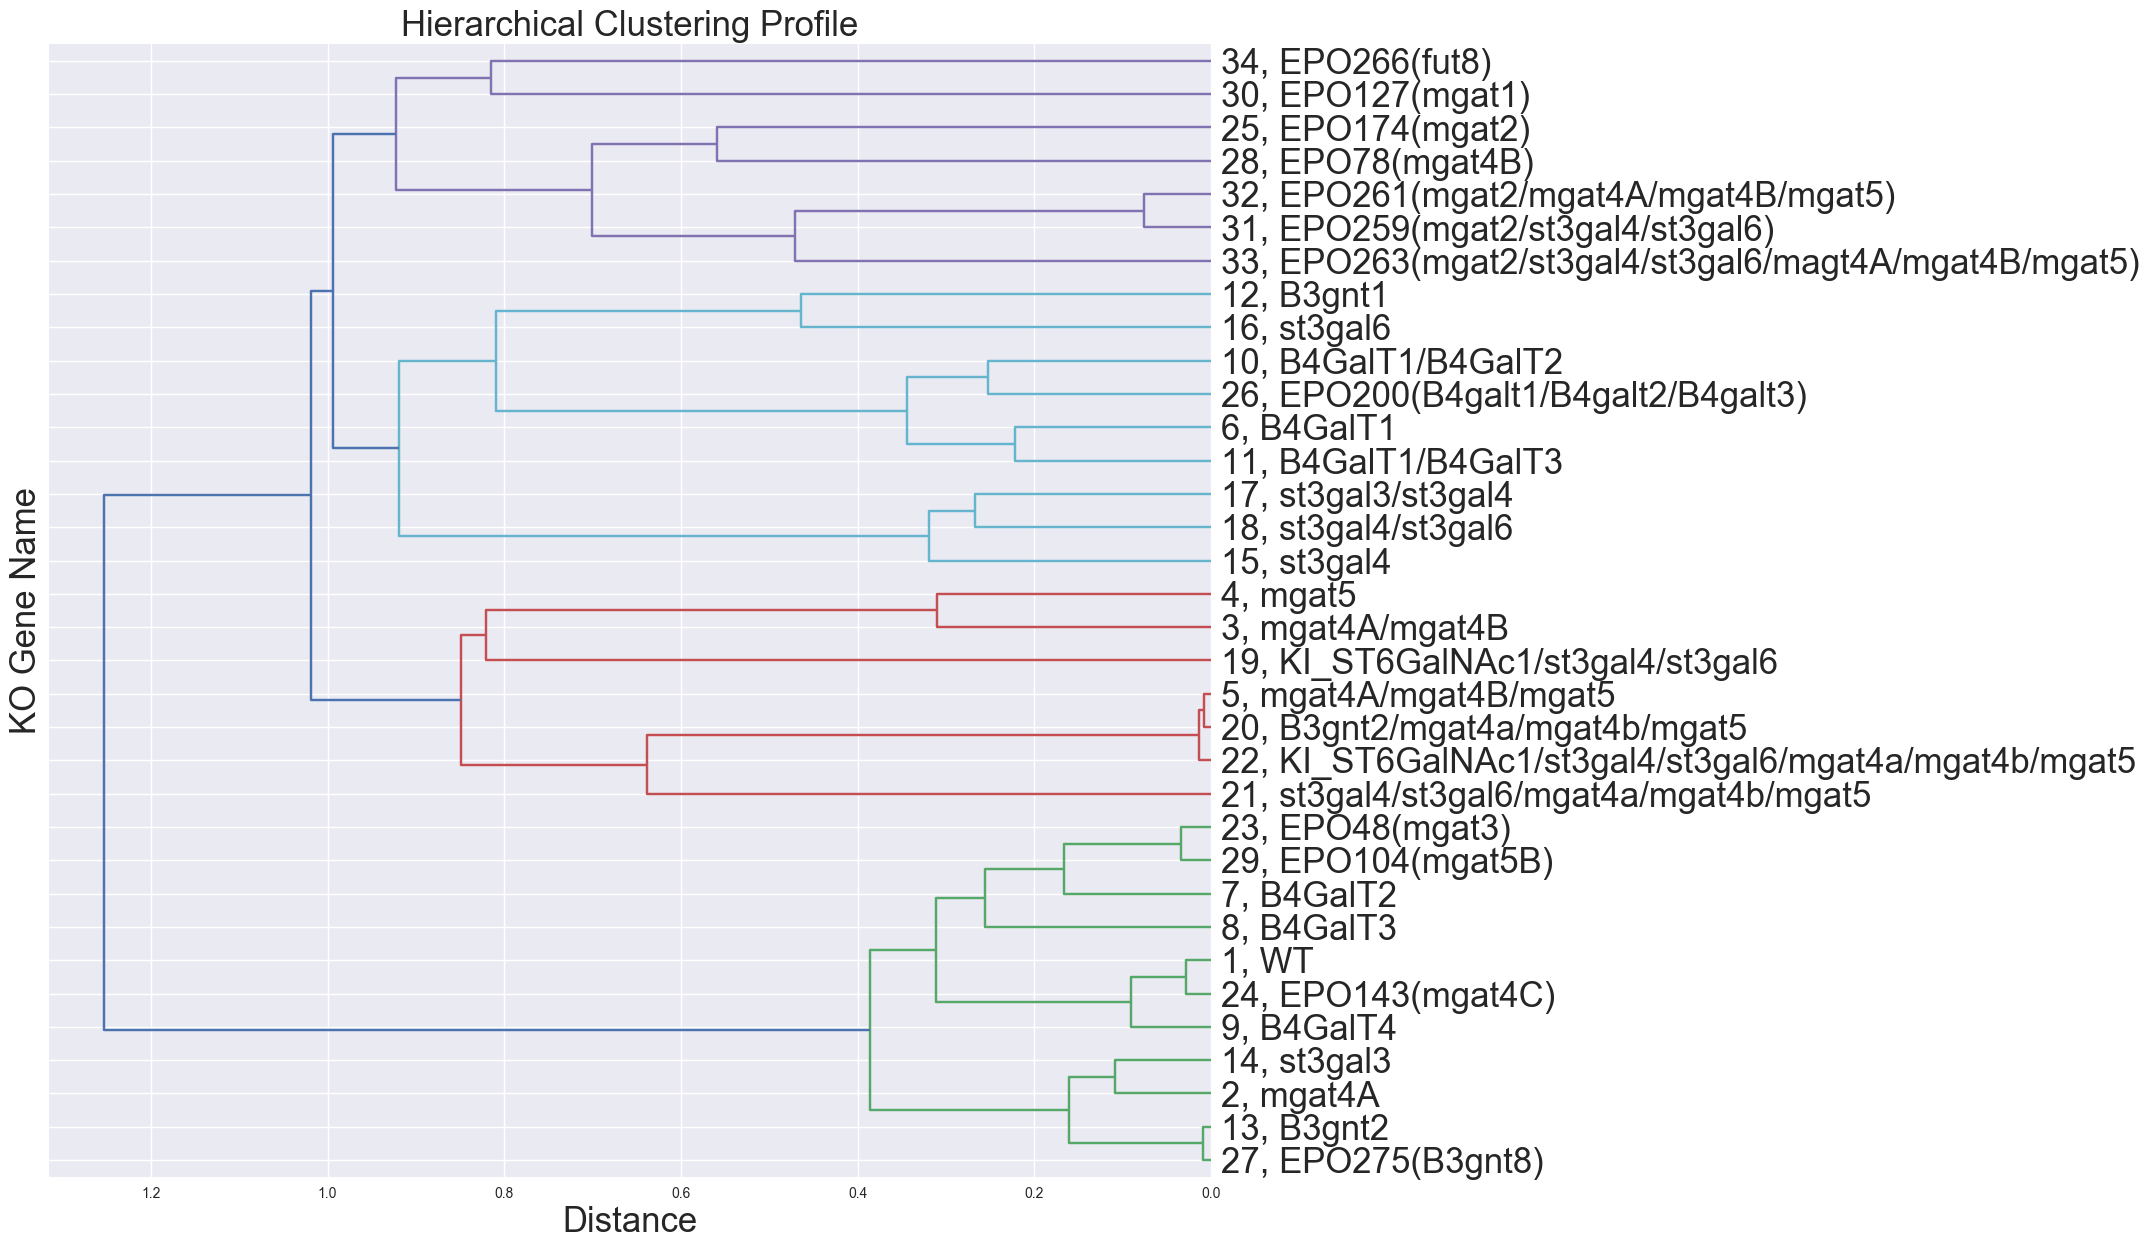

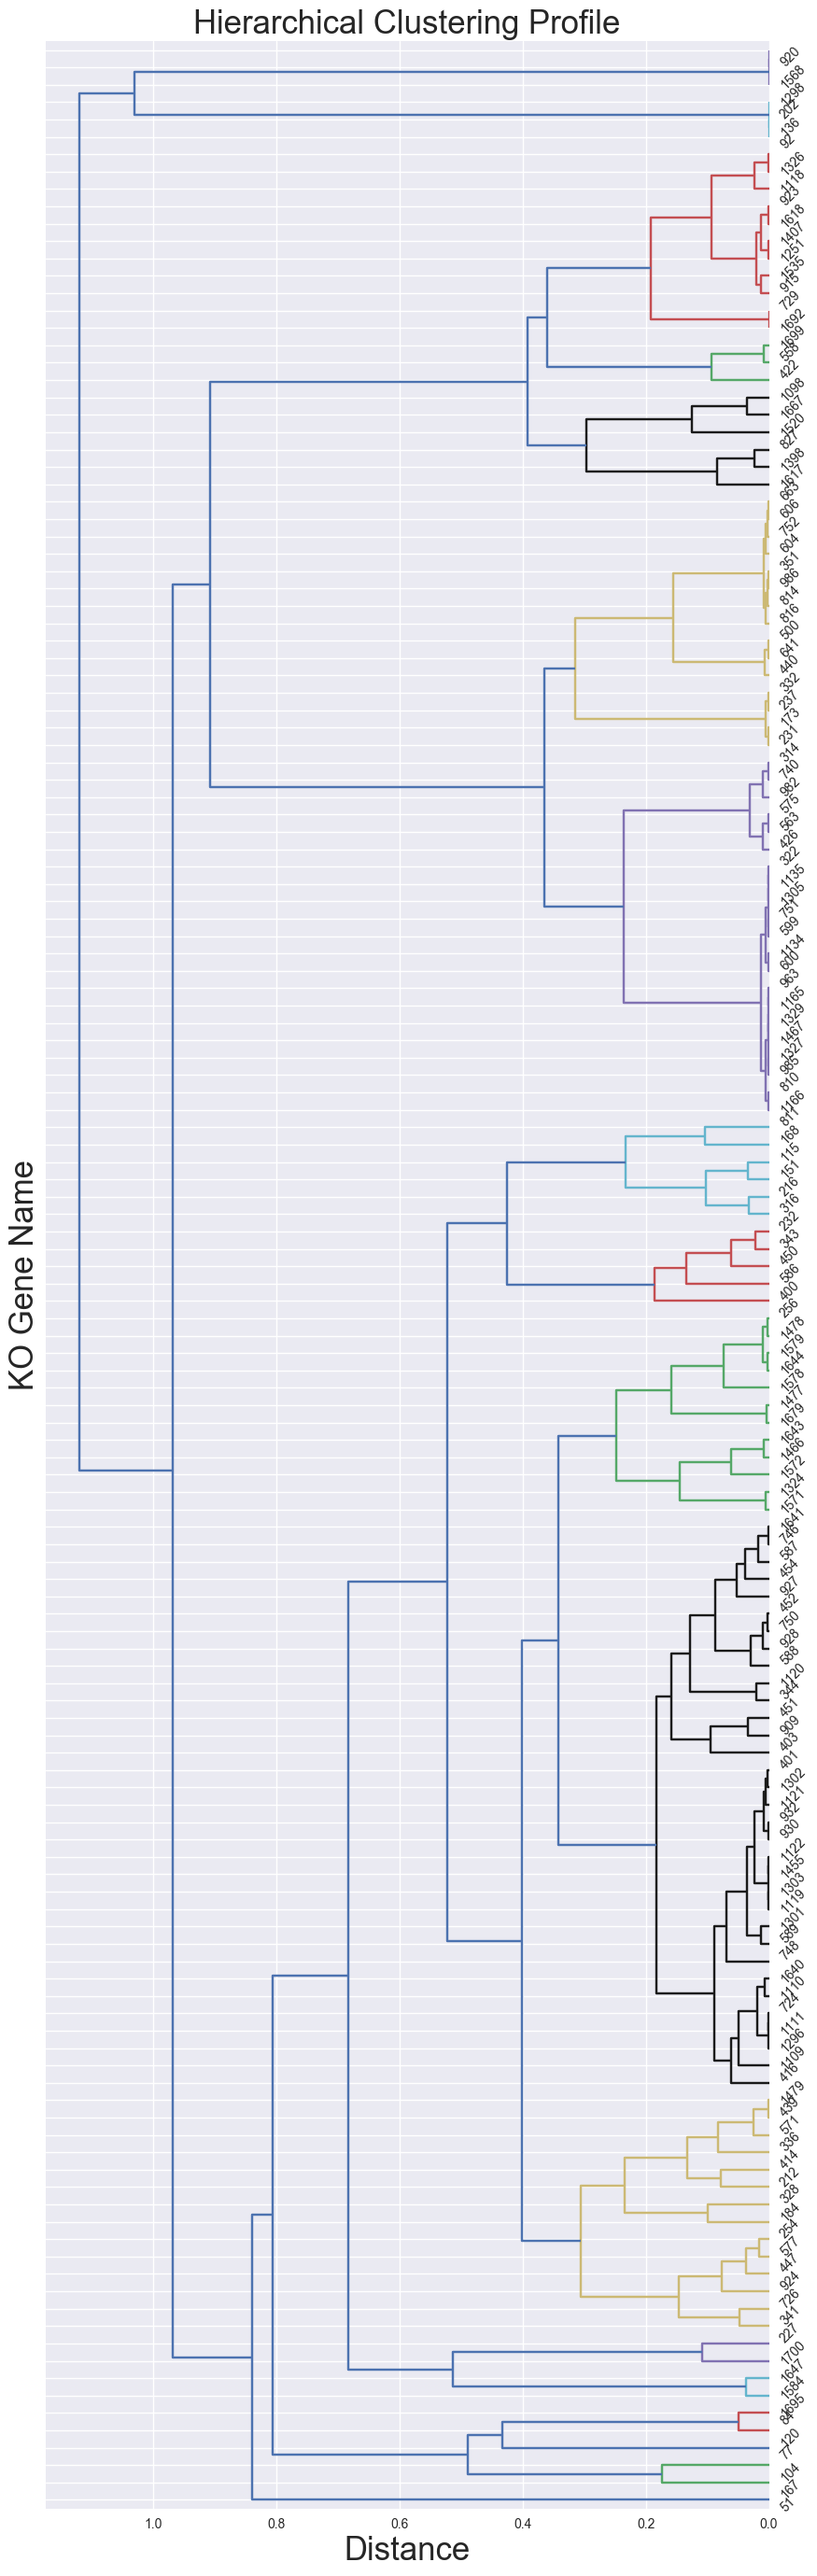

In [221]:
import seaborn as sns
import clustering_analysis_pip
import scipy
reload(clustering_analysis_pip)
# sns.set("RdBu_r", 7)
# dropper.drop_node()
# print("", len(dropper.drop_node()))
motif_abd_table =  table_generator.table_against_wt_relative_abd()
df_ncore = motif_abd_table[motif_abd_table.index.isin(mod_nodes)]
# draw plot
# motif_with_n_glycan_core_all_motif(motif_, _table, weight_dict)
""" with n_glycan_core using jaccard for binary and use braycurtis for float
"""
df_ncore.to_csv(__init__.json_address + r"abundance_matrix.txt")
name_prefix = 'dropped'
# sns.palplot(sns.color_palette("RdBu_r", 7))
# help(scipy.cluster.hierarchy.dendrogram)
g = sns.clustermap(df_ncore, metric="correlation",cmap=sns.diverging_palette(247,10,99,54,1,20),z_score=0, linewidths=.01,figsize=(20,20),linecolor='black')
clustering_analysis_pip.draw_profile_cluster(g, df_ncore, clustering_analysis_pip.profile_name, name_prefix, color_threshold=0.95)
cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.33)


[84, 120]
[77]
[104, 167]
[115, 151, 168, 216, 232, 316]
[256, 343, 400, 450, 586]
[1324, 1466, 1477, 1478, 1571, 1572, 1578, 1579, 1641, 1643, 1644, 1679]
[344, 401, 403, 416, 451, 452, 454, 587, 588, 589, 724, 746, 748, 750, 909, 927, 928, 930, 932, 1109, 1110, 1111, 1119, 1120, 1121, 1122, 1296, 1301, 1302, 1303, 1455, 1479, 1640]
[184, 212, 227, 254, 328, 336, 341, 414, 439, 447, 571, 577, 726, 924]
[1584, 1695]
[1647, 1700]
[51]
[663, 827, 1398, 1520, 1617, 1667]
[729, 915, 923, 1118, 1251, 1326, 1407, 1535, 1618, 1692, 1699]
[422, 558, 1098]
[173, 231, 237, 314, 332, 351, 440, 500, 604, 606, 641, 752, 814, 816, 986]
[322, 426, 563, 575, 599, 600, 740, 751, 810, 811, 963, 982, 985, 1134, 1135, 1165, 1166, 1305, 1327, 1329, 1467]
[920, 1298, 1568]
[92, 136, 202]


'[84, 120]\n[77]\n[104, 167]\n[115, 151, 168, 216, 232, 316]\n[256, 343, 400, 450, 586]\n[1324, 1466, 1477, 1478, 1571, 1572, 1578, 1579, 1641, 1643, 1644, 1679]\n[344, 401, 403, 416, 451, 452, 454, 587, 588, 589, 724, 746, 748, 750, 909, 927, 928, 930, 932, 1109, 1110, 1111, 1119, 1120, 1121, 1122, 1296, 1301, 1302, 1303, 1455, 1479, 1640]\n[184, 212, 227, 254, 328, 336, 341, 414, 439, 447, 571, 577, 726, 924]\n[1584, 1695]\n[1647, 1700]\n[51]\n[663, 827, 1398, 1520, 1617, 1667]\n[729, 915, 923, 1118, 1251, 1326, 1407, 1535, 1618, 1692, 1699]\n[422, 558, 1098]\n[173, 231, 237, 314, 332, 351, 440, 500, 604, 606, 641, 752, 814, 816, 986]\n[322, 426, 563, 575, 599, 600, 740, 751, 810, 811, 963, 982, 985, 1134, 1135, 1165, 1166, 1305, 1327, 1329, 1467]\n[920, 1298, 1568]\n[92, 136, 202]'

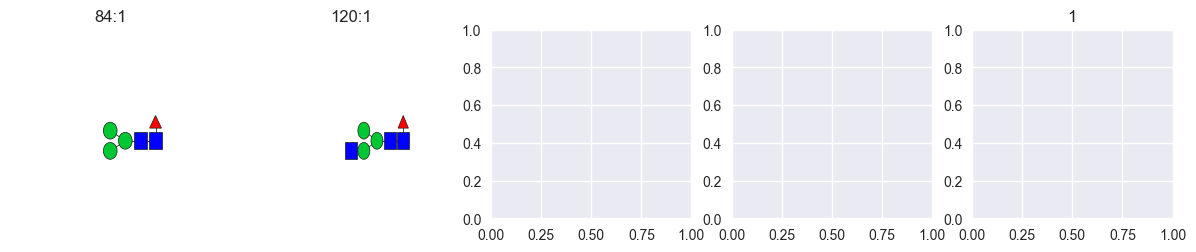

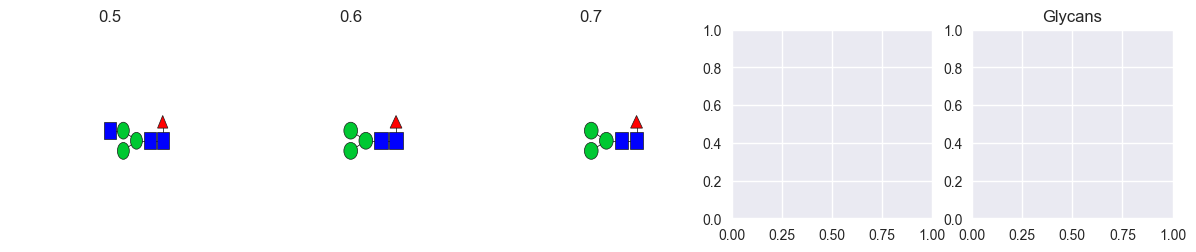

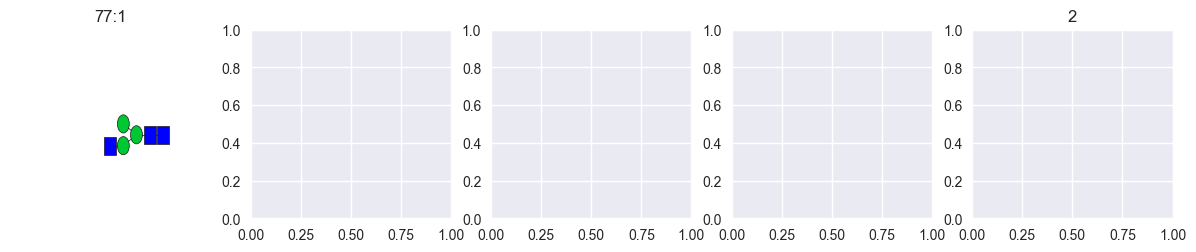

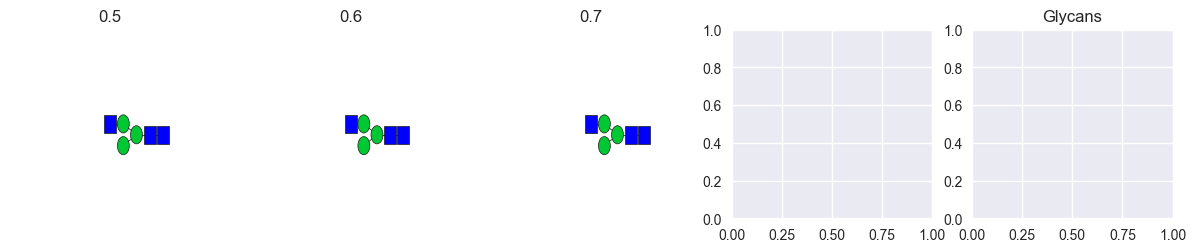

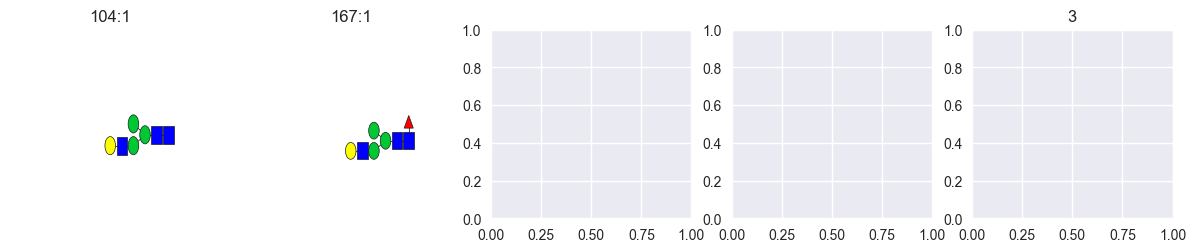

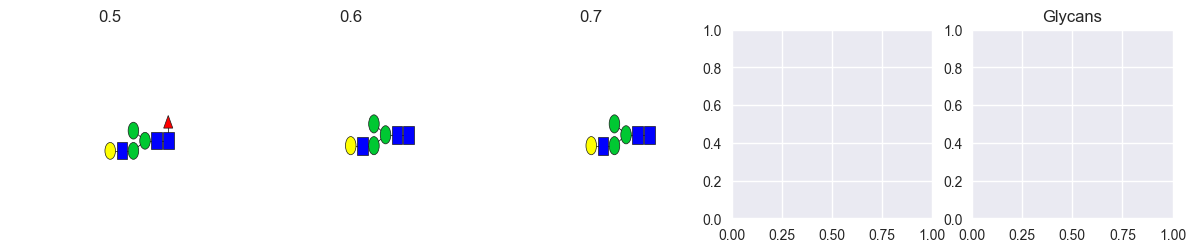

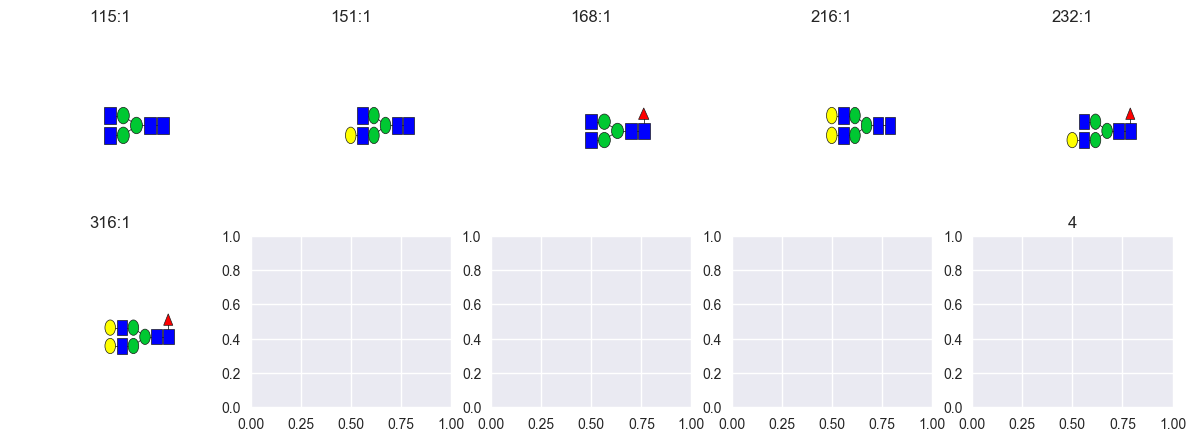

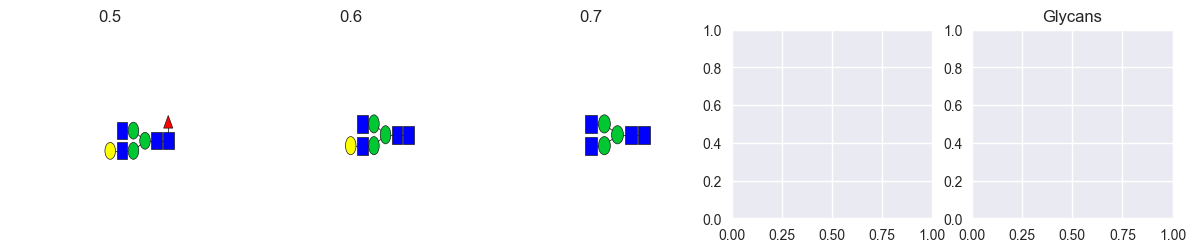

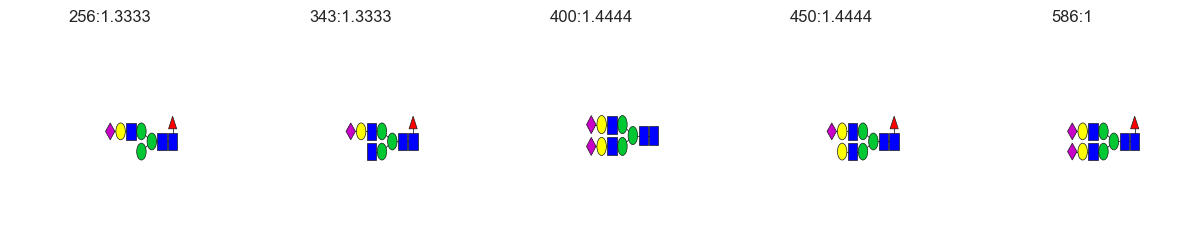

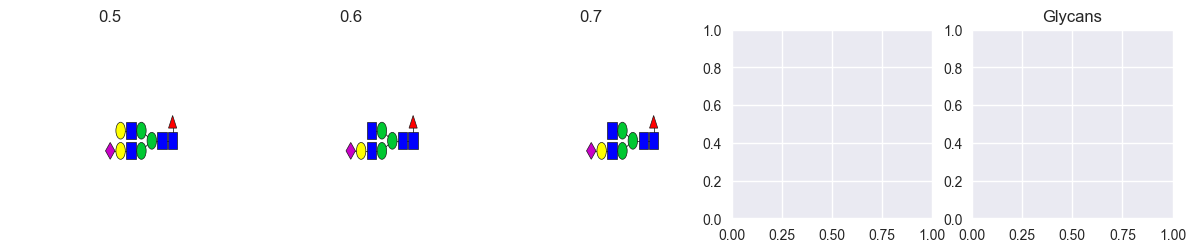

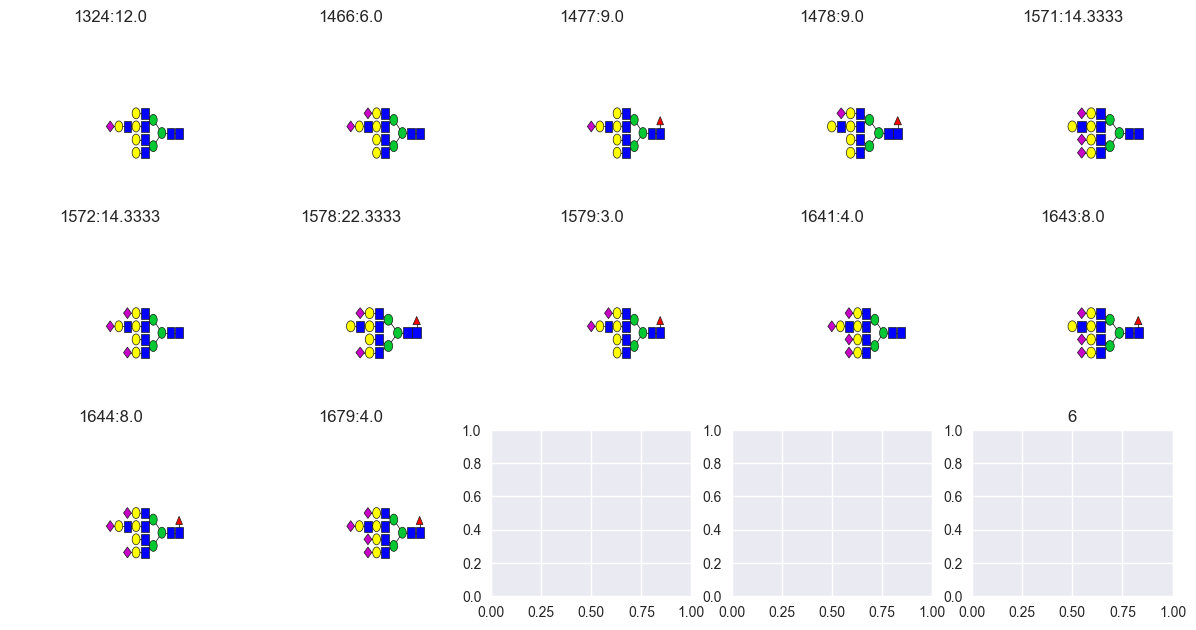

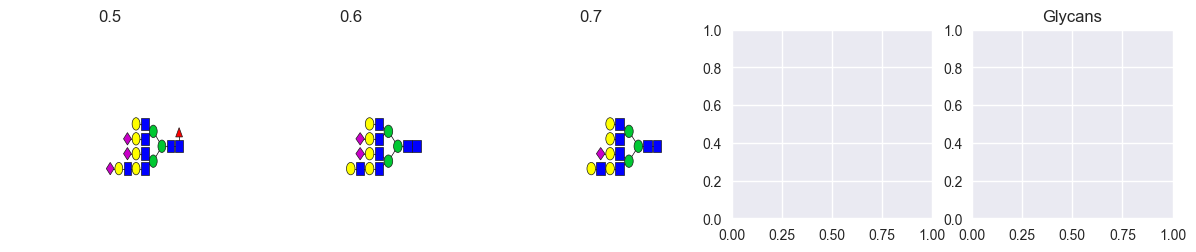

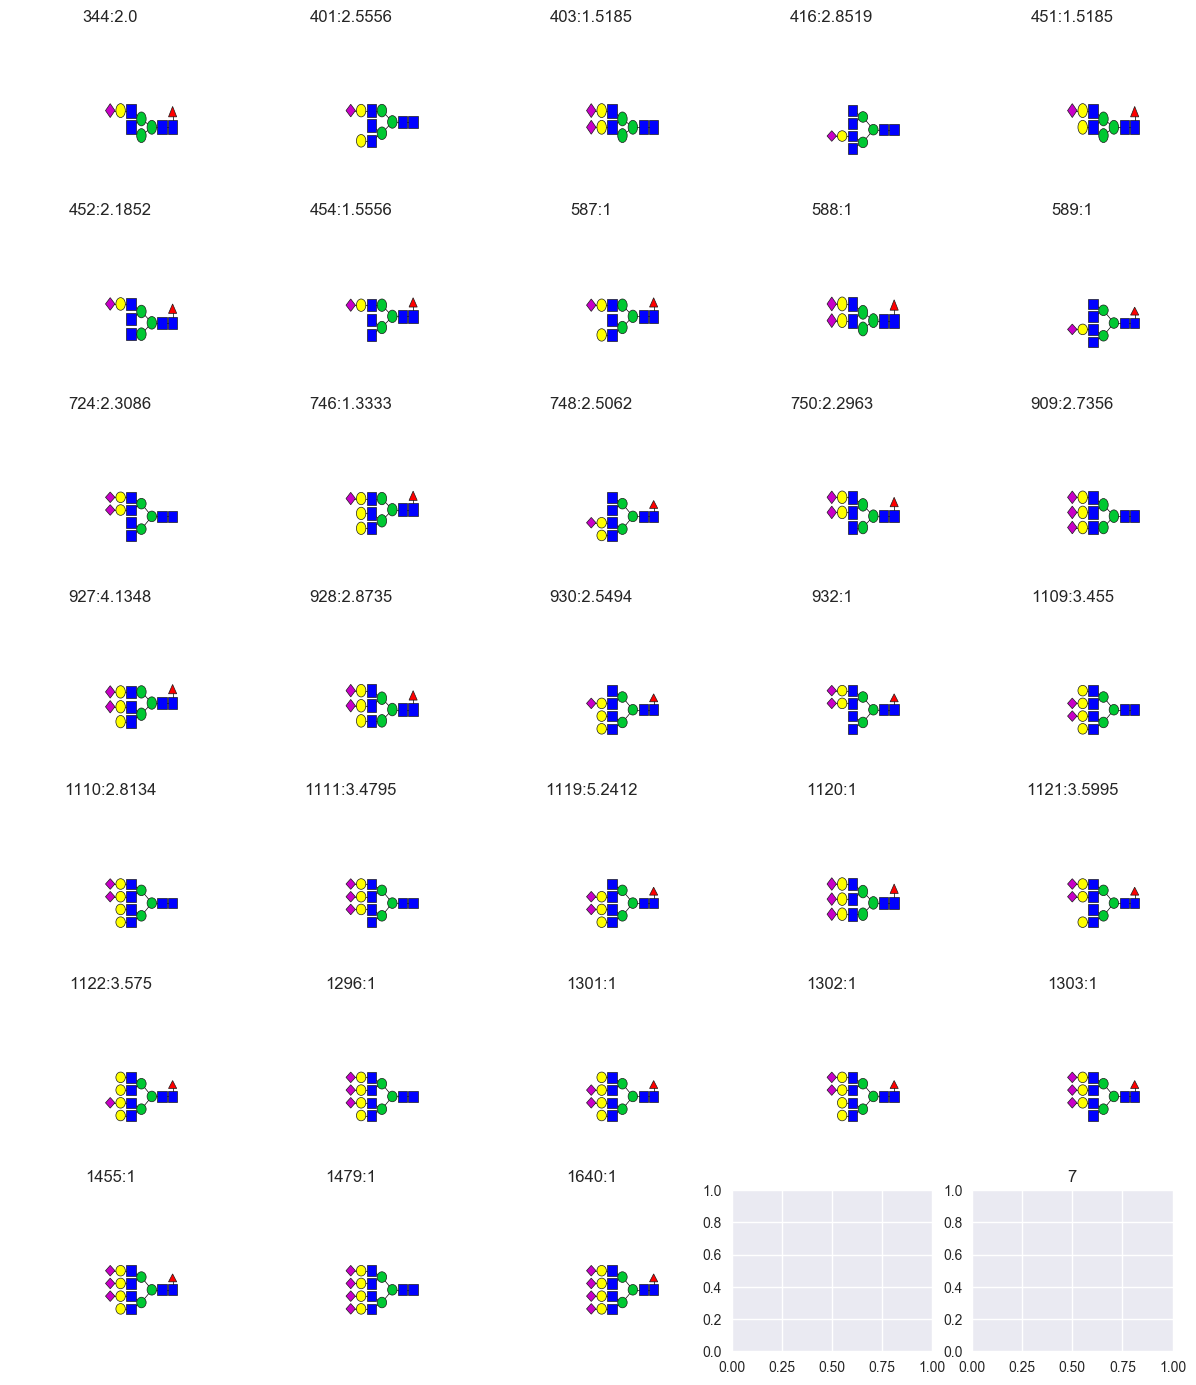

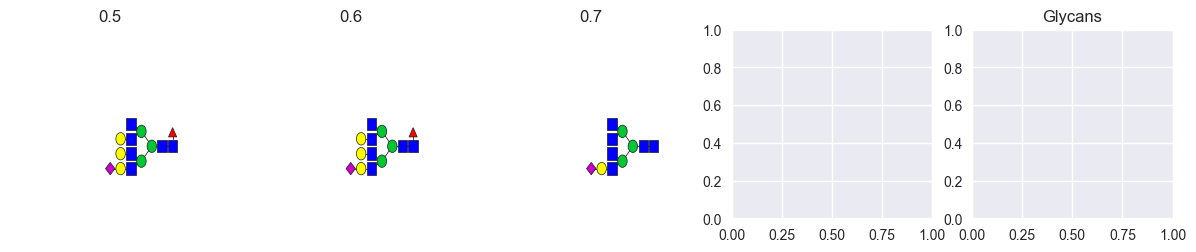

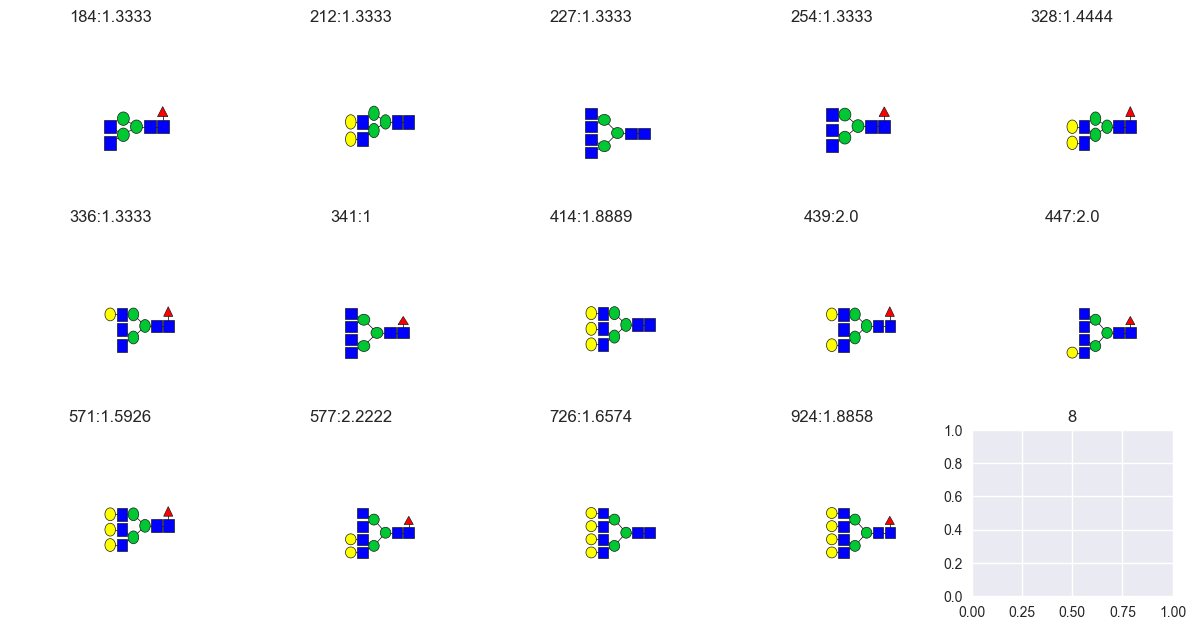

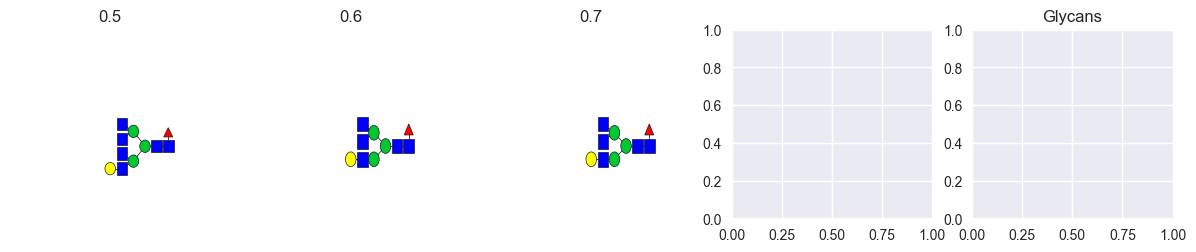

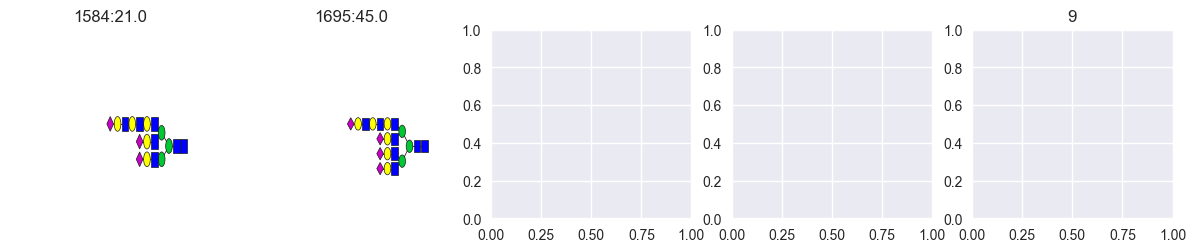

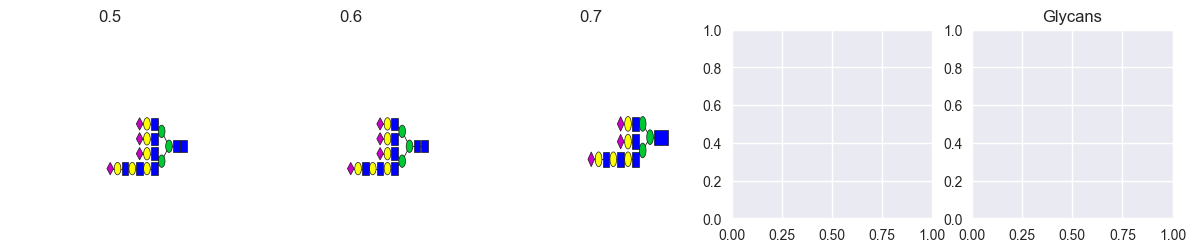

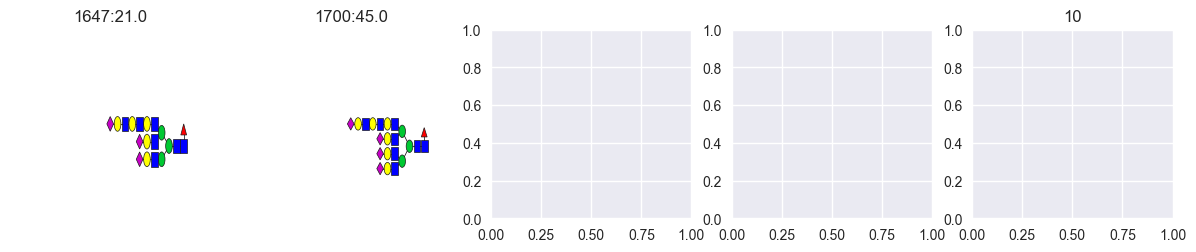

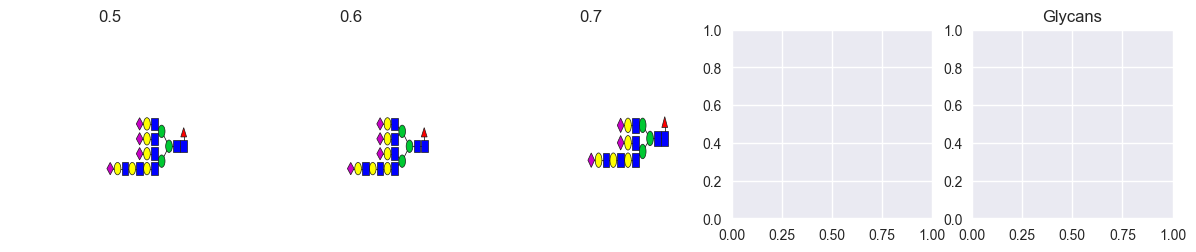

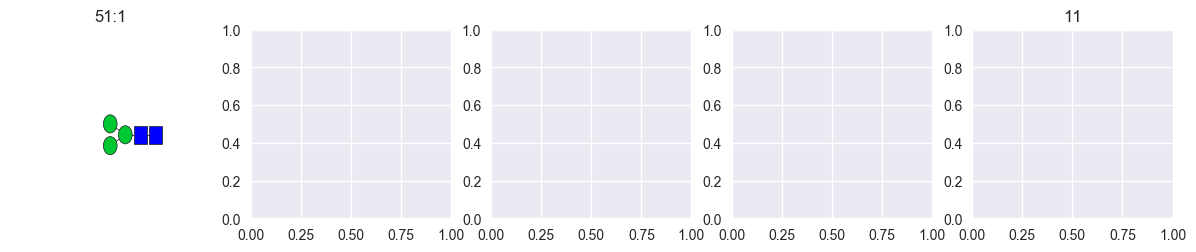

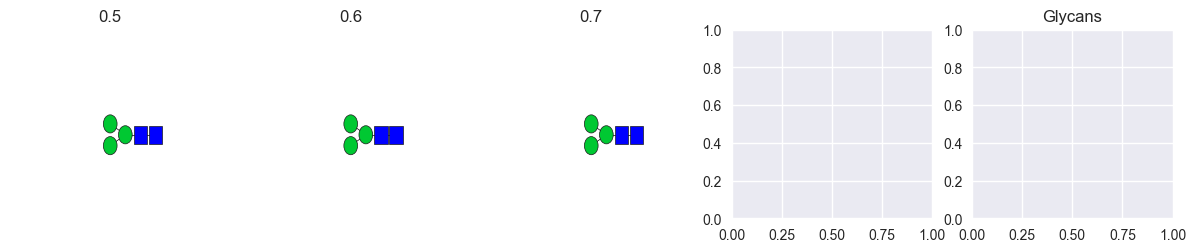

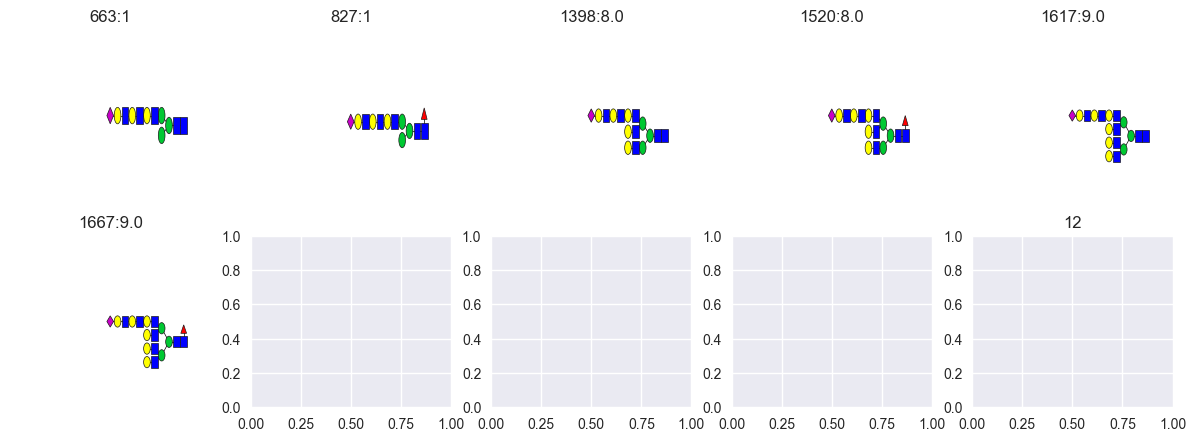

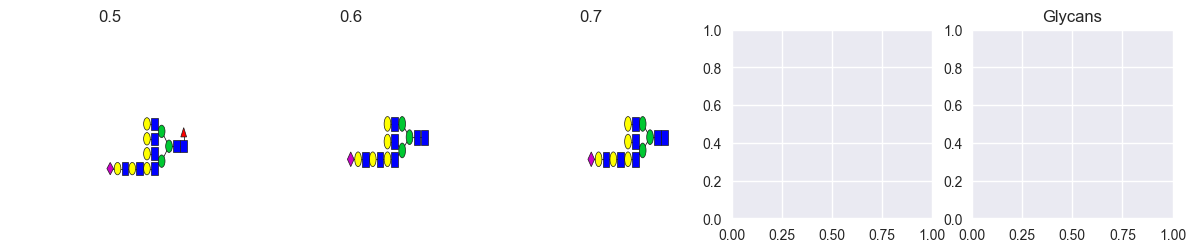

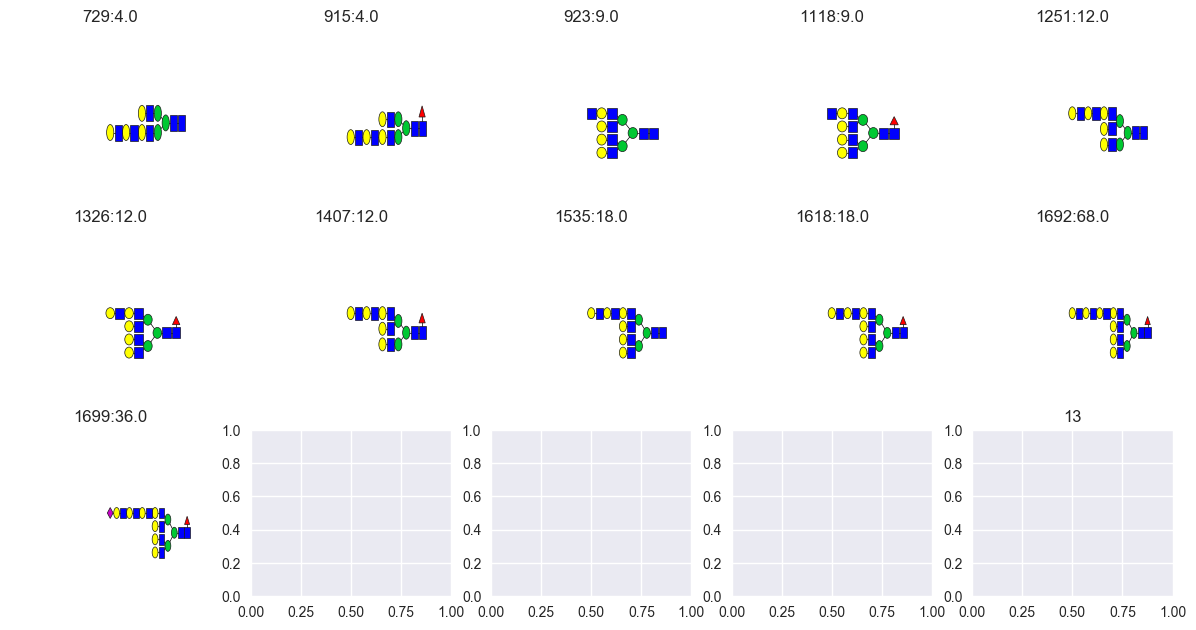

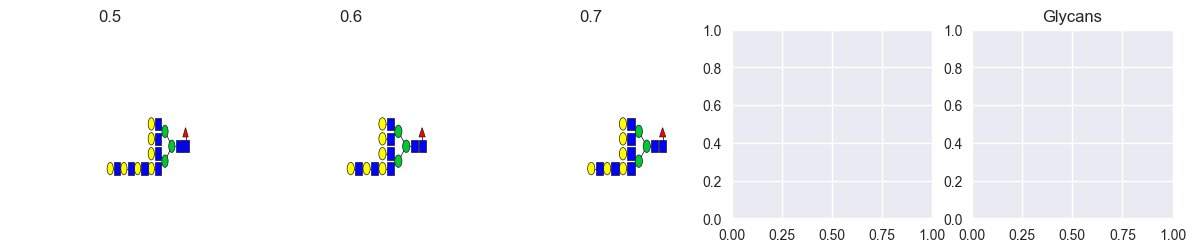

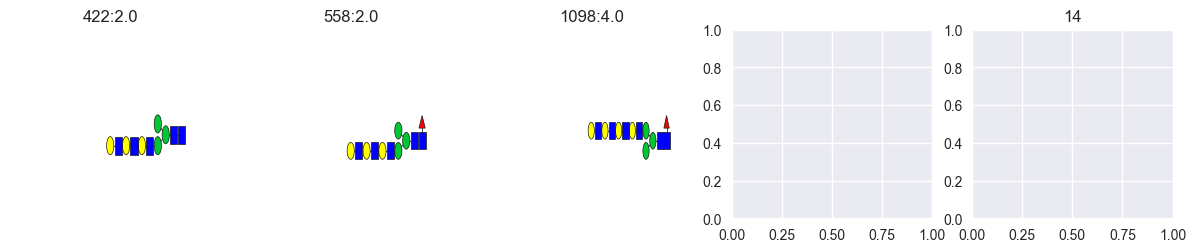

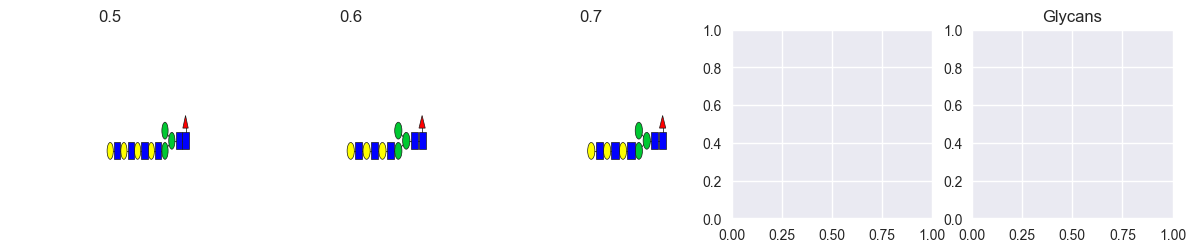

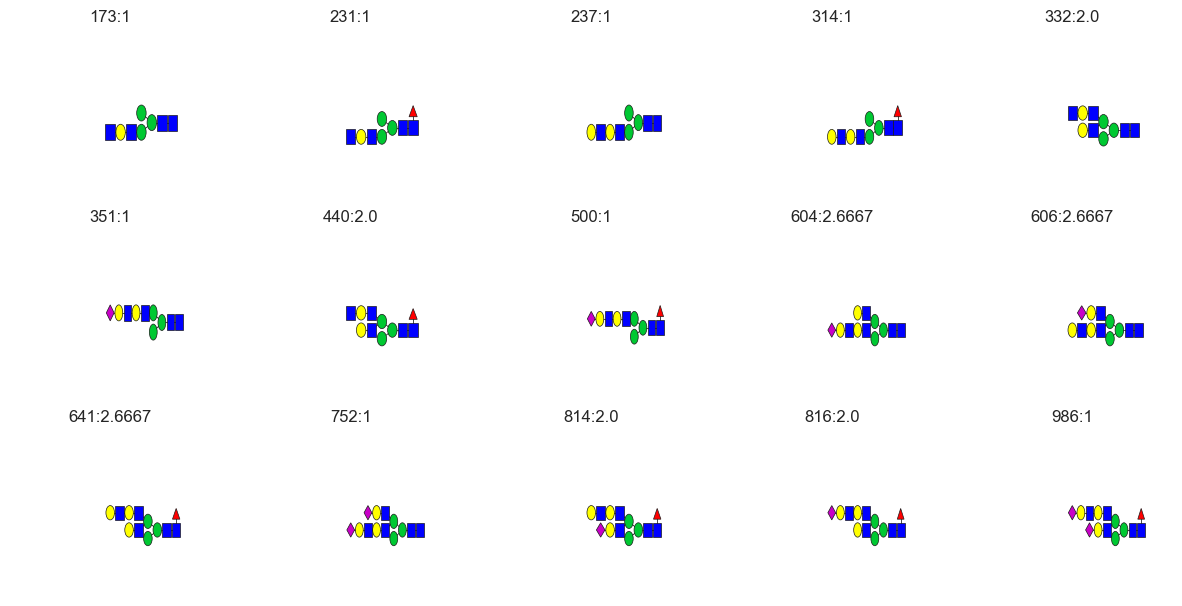

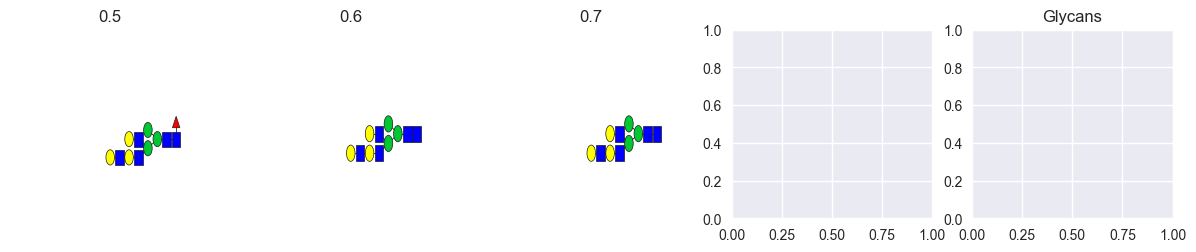

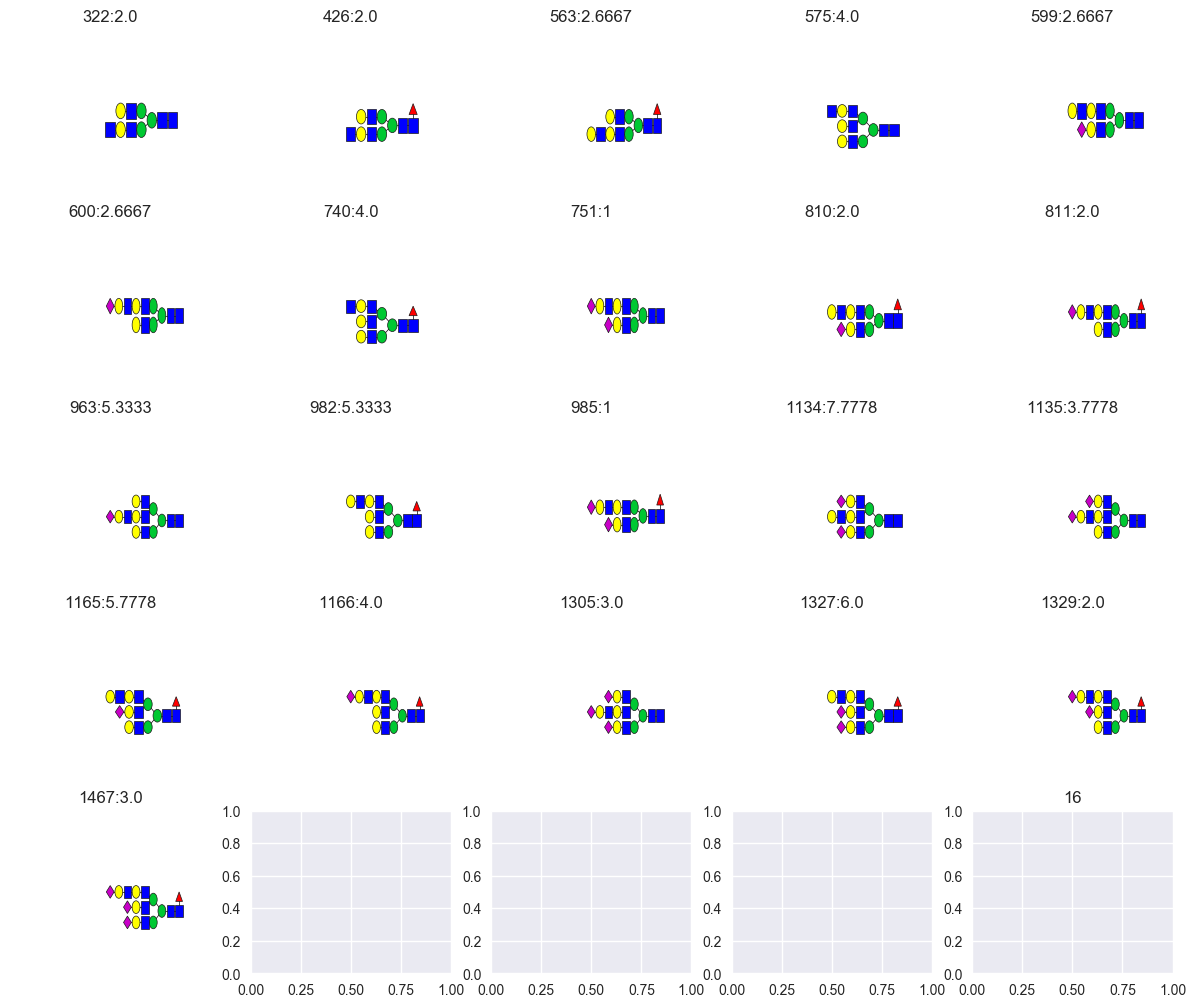

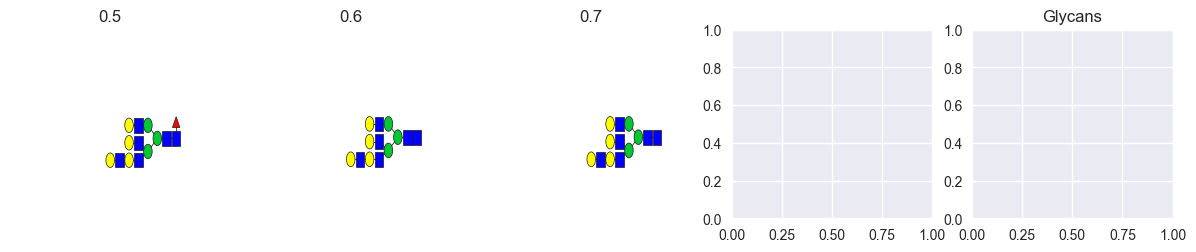

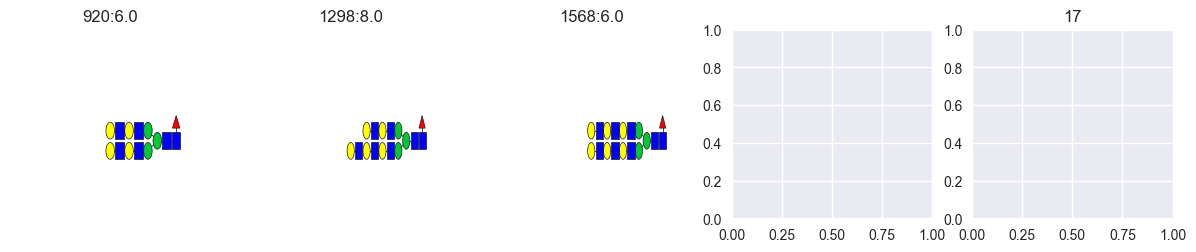

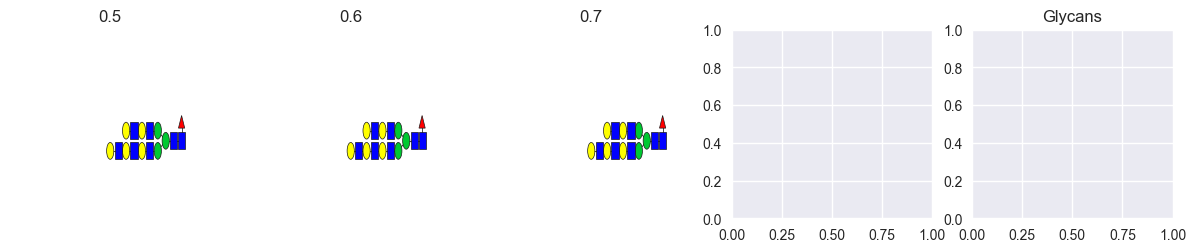

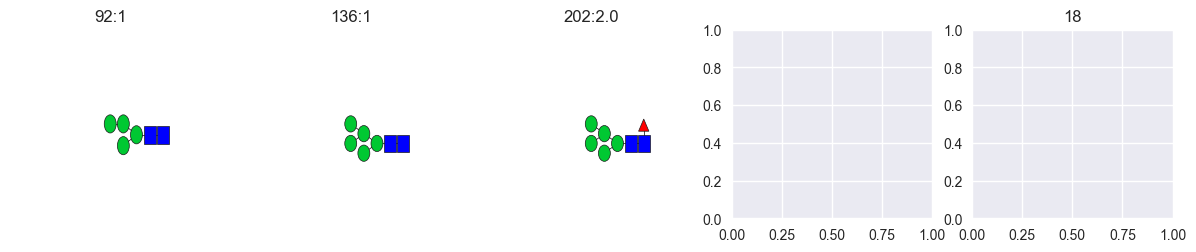

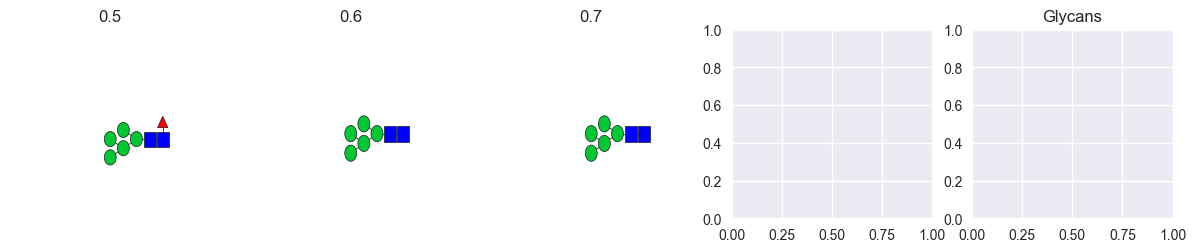

In [220]:
# clustering_analysis_pip.draw_glycan_cluster(cccluster_dict, name_prefix, motif_vec)
# cccluster_dict
reload(nglycan_alignment)
reload(clustering_analysis_pip)
# cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.35)
# cccluster_dict = clustering_analysis_pip.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.35)
clustering_analysis_pip.draw_glycan_cluster(cccluster_dict, name_prefix, motif_vec, merged_weights_dict)
"""[84, 120]
[77]
[104, 167]
[115, 151, 168, 216, 232, 316]
[256, 343, 400, 450, 586]
[1324, 1466, 1477, 1478, 1571, 1572, 1578, 1579, 1641, 1643, 1644, 1679]
[344, 401, 403, 416, 451, 452, 454, 587, 588, 589, 724, 746, 748, 750, 909, 927, 928, 930, 932, 1109, 1110, 1111, 1119, 1120, 1121, 1122, 1296, 1301, 1302, 1303, 1455, 1479, 1640]
[184, 212, 227, 254, 328, 336, 341, 414, 439, 447, 571, 577, 726, 924]
[1584, 1695]
[1647, 1700]
[51]
[663, 827, 1398, 1520, 1617, 1667]
[729, 915, 923, 1118, 1251, 1326, 1407, 1535, 1618, 1692, 1699]
[422, 558, 1098]
[173, 231, 237, 314, 332, 351, 440, 500, 604, 606, 641, 752, 814, 816, 986]
[322, 426, 563, 575, 599, 600, 740, 751, 810, 811, 963, 982, 985, 1134, 1135, 1165, 1166, 1305, 1327, 1329, 1467]
[920, 1298, 1568]
[92, 136, 202]"""


21.0
45.0
G add 45.0
M1 add 45.0
M2_1 add 45.0
Glc_1 add 45.0
R add 45.0
G add 45.0
R add 45.0
G add 45.0
R add 45.0
S add 45.0
Glc_2 add 45.0
R add 45.0
S add 45.0
M2_2 add 45.0
Glc_1 add 45.0
R add 45.0
S add 45.0
66.0
G 66.0
M1 66.0 66.0 1.0 0.4
M2_1 66.0 66.0 1.0 0.4
Glc_1 66.0 66.0 1.0 0.4
R 66.0 66.0 1.0 0.4
G 66.0 66.0 1.0 0.4
R 66.0 66.0 1.0 0.4
G 66.0 66.0 1.0 0.4
R 66.0 66.0 1.0 0.4
S 66.0 66.0 1.0 0.4
Glc_2 66.0 66.0 1.0 0.4
R 66.0 66.0 1.0 0.4
S 66.0 66.0 1.0 0.4
M2_2 66.0 66.0 1.0 0.4
Glc_1 66.0 66.0 1.0 0.4
R 66.0 66.0 1.0 0.4
S 66.0 66.0 1.0 0.4
Glc_2 45.0 66.0 0.6818181818181818 0.4
R 45.0 66.0 0.6818181818181818 0.4
S 45.0 66.0 0.6818181818181818 0.4
G 66.0
M1 66.0 66.0 1.0 0.5
M2_1 66.0 66.0 1.0 0.5
Glc_1 66.0 66.0 1.0 0.5
R 66.0 66.0 1.0 0.5
G 66.0 66.0 1.0 0.5
R 66.0 66.0 1.0 0.5
G 66.0 66.0 1.0 0.5
R 66.0 66.0 1.0 0.5
S 66.0 66.0 1.0 0.5
Glc_2 66.0 66.0 1.0 0.5
R 66.0 66.0 1.0 0.5
S 66.0 66.0 1.0 0.5
M2_2 66.0 66.0 1.0 0.5
Glc_1 66.0 66.0 1.0 0.5
R 66.0 66.0 1.0 0.

(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=54819788282680850572134304835920766771  x=4.5924254968e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x175fb1f28>)

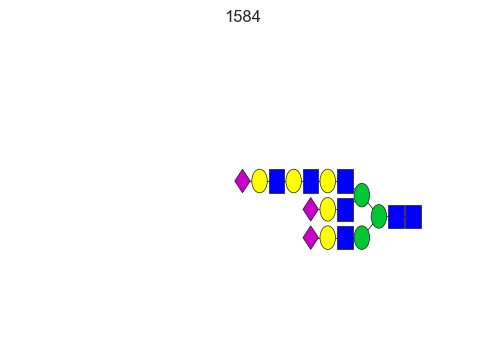

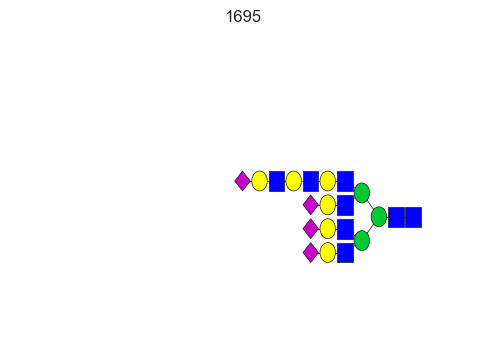

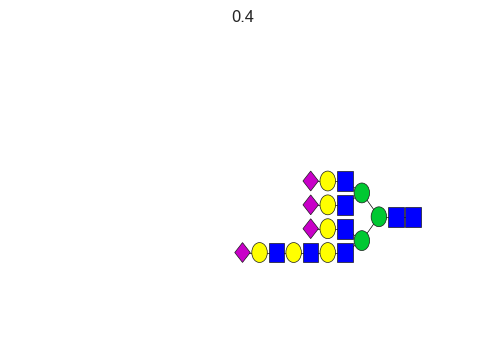

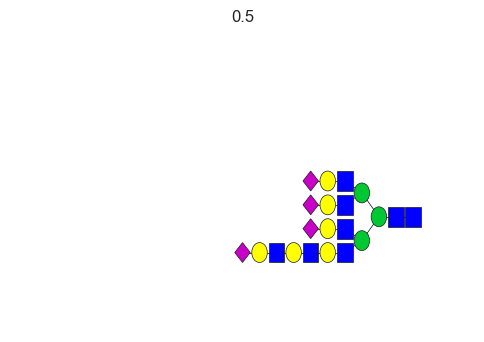

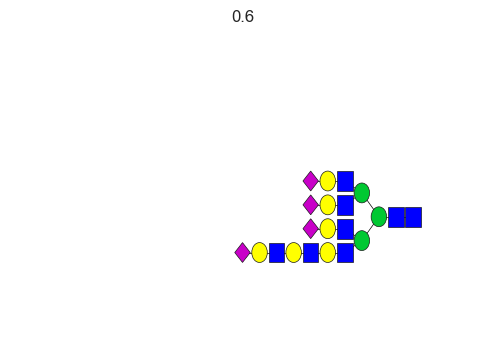

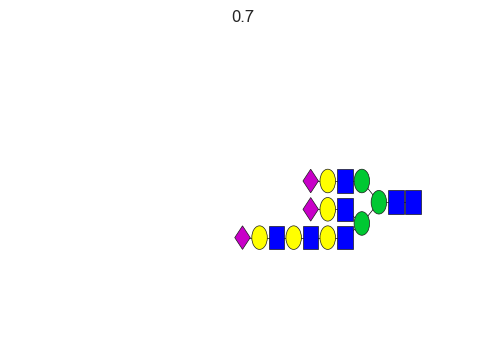

In [212]:
import nglycan_alignment
reload(nglycan_alignment)
_list = [1584,1695]
a_panel = nglycan_alignment.glycan_model()
# merged_weights_dict
for i in _list:
    print(merged_weights_dict[i])
    plot_glycan_utilities.plot_glycan(motif_vec[i], title=str(i))
    gly_dict = nglycan_alignment.traves_glycan(motif_vec[i], weight=merged_weights_dict[i])
    a_panel.glycan_walk(gly_dict)

# NBT_nglycan_alignment.travel_str_dict(a_panel.panel)
print(a_panel.total_weight)
plot_glycan_utilities.plot_glycan(a_panel.get_common_representative(0.4), title='0.4')
plot_glycan_utilities.plot_glycan(a_panel.get_common_representative(0.5), title='0.5')
plot_glycan_utilities.plot_glycan(a_panel.get_common_representative(0.6), title='0.6')
plot_glycan_utilities.plot_glycan(a_panel.get_common_representative(0.7), title='0.7')
# plot_glycan_utilities.plot_glycan(a_panel.get_common_representative(0.9))

In [76]:
print(node_table[node_table.node.isin([84, 92,136,142,202])])
# plot_glycan_utilities.plot_glycan_list([motif_vec[x] for x in [92,136,142,202]], title=[84, 92,136,142,202])
_a.get_value_unnormed(84, 92, _a.get_corr)

    correlation  in_d  node  node_mean  node_var  out_d     p_value
2      0.977162     1    84   0.955345  0.035318      2   79.053975
3      0.057143     1    92   0.029412  0.028547      2  200.000000
8      0.973445     1   136   0.027890  0.025669      1  200.000000
9      0.029227     2   142   0.014168  0.006624      1   57.896123
18     0.673741     2   202   0.014168  0.006624      0  200.000000


0.028775032479817941

1391
932
716
508


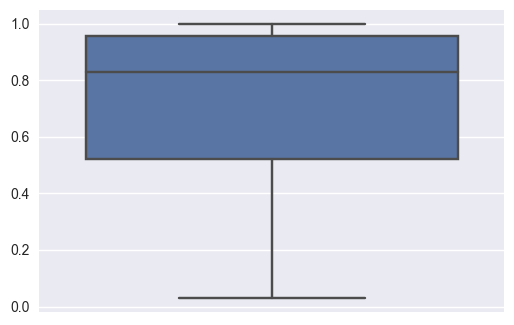

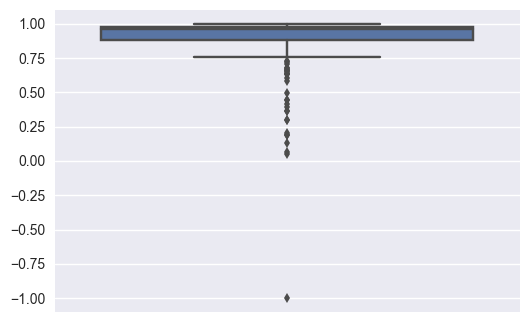

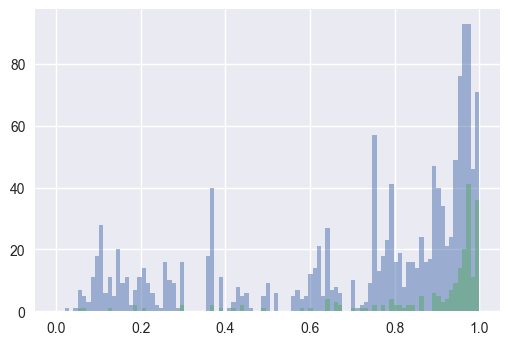

In [201]:
x1 = _a.get_edge_corr_dis()
count=0
while 1 in x1:
    x1.remove(1)
    count+=1

print(len(x1))
print(count)

x_1 = _a.get_node_value()
print(len(x_1))
count=0
while 1 in x_1:
    x_1.remove(1)
    count+=1
print(count)  
# corr_table = pd.DataFrame({'edge':x1, 'node':x_1})
from scipy.stats.mstats import mquantiles
sns.boxplot(x1, orient='v')
plt.show()
sns.boxplot(x_1, orient='v')
plt.show()

bins = np.linspace(0, 1, 100)
plt.hist(x1, bins, alpha=0.5)
plt.hist(x_1, bins, alpha=0.5)
plt.show()


In [102]:
x2 = _a.get_edge_onettest_dis()
print(x2)
# x2 = -np.log(x2)
# x3 = _a.get_edge_ttest_dis()
# x4 = _a.get_node_value('one_vs_rest_t')
# x4 = -np.log(x2)
# y = [random.gauss(4,2) for _ in range(400)]

# bins = np.linspace(0, 1, 100)
# plt.hist(x2, bins, alpha=0.5)
# # plt.hist(x4, bins, alpha=0.5)
# plt.show()

[25.328436022934504, 25.328436022934504, 1.1473332782283665, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 1.8128991387388762, nan, nan, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 11.28657553736862, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 22.326418382202579, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 12.563256013684549, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 11.926789427150485, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.3284360

In [84]:
print(len(x2),sorted(x2))

2323 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.3908057128440472e-95, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 2.5662855446610674e-66, 5.6420765212425582e-59, 4.0660490736807038e-58, 2.0703723424221542e-56, 3.1378223356434521e-55, 3.9919034264346668e-54, 3.3517431455327388e-53, 3.3517431455327388e-53, 3.3517431455327388e-53, 3.3517431455327388e-53, 2.9458773809540332e-51, 1.971981712170141e-50, 3.836066647590328e-50, 3.4548137174793307e-49, 2.353603982283539e-48, 2.353603982283539e-48, 2.5399630497623163e-46, 3.8871915371450299e-46, 1.8639275177863266e-45, 4.4537177507365209e-45, 9.6738598795618099e-45, 5.7928477244885182e-44, 5.9614723648106676e-44, 1.4275115844425869e-43, 1.436263043545

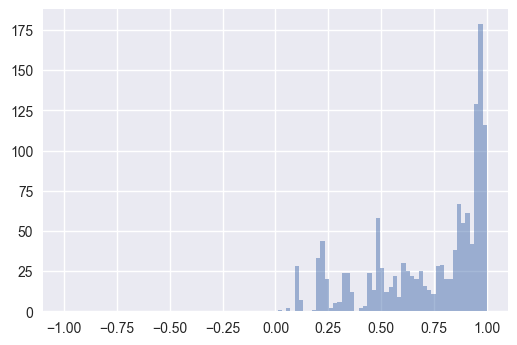

In [107]:
_corr = _a.get_edge_corr_dis()
while 1 in _corr:
    _corr.remove(1)
bins = np.linspace(-1, 1, 100)
plt.hist(_corr, bins, alpha=0.5)
# plt.hist(x_1, bins, alpha=0.5)
plt.show()

In [12]:
scoredMotifs_occurence_vector=[sum(i) for i in np.array(motif_existance_table)]
method='chi_squared'
relative='child'
motif_hierarchy = np.array(edge_list)
import hierarchical_enrichment
reload(hierarchical_enrichment)
dropper = motif_class.NodesDropper(nglycan_motif_lab.motif_dep_tree_ncore, motif_class.get_weight_dict(table_generator.table_against_wt_relative_abd()))
rep_quantile = hierarchical_enrichment.hier_enrich_glycoprofile_occurence(glycoprofile_list, scoredMotifs_occurence_vector, np.array(edge_list), nglycan_motif_lab.motif_vec)

In [13]:
# rep_quantile = [rep_quantile[i] for i in dropper.all_nodes]
quantile_table=pd.DataFrame(data=rep_quantile, columns=[0,0.25,0.5,0.75,1])
quantile_table.head()
quantile_table.fillna(1)

0.00     0.25     0.50     0.75     1.00
0          --       --       --       --       --
1          --       --       --       --       --
2          --       --       --       --       --
3          --       --       --       --       --
4          --       --       --       --       --
5          --       --       --       --       --
6          --       --       --       --       --
7          --       --       --       --       --
8          --       --       --       --       --
9          --       --       --       --       --
10         --       --       --       --       --
11         --       --       --       --       --
12         --       --       --       --       --
13         --       --       --       --       --
14         --       --       --       --       --
15         --       --       --       --       --
16         --       --       --       --       --
17         --       --       --       --       --
18         --       --       --       --       --
19         --       --       --       --       --
20         --       --       --       --       --
21         --       --       --       --       --
22         --       --       --       --       --
23         --       --       --       --       --
24         --       --       --       --       --
25         --       --       --       --       --
26         --       --       --       --       --
27         --       --       --       --       --
28         --       --       --       --       --
29         --       --       --       --       --
...       ...      ...      ...      ...      ...
1665       --       --       --       --       --
1666        1        1        1        1        1
1667        1        1        1        1        1
1668        1        1        1        1        1
1669        1        1        1        1        1
1670        1        1        1        1        1
1671        1        1        1        1        1
1672        1        1        1        1        1
1673        1        1        1        1        1
1674        1        1        1        1        1
1675        1        1        1        1        1
1676       --       --       --       --       --
1677        1        1        1        1        1
1678        1        1        1        1        1
1679        1        1        1        1        1
1680  0.96125  0.96125  0.96125  0.96125  0.96125
1681  0.96125  0.96125  0.96125  0.96125  0.96125
1682  0.96125  0.96125  0.96125  0.96125  0.96125
1683        1        1        1        1        1
1684        1        1        1        1        1
1685        1        1        1        1        1
1686        1        1        1        1        1
1687       --       --       --       --       --
1688       --       --       --       --       --
1689       --       --       --       --       --
1690       --       --       --       --       --
1691       --       --       --       --       --
1692       --       --       --       --       --
1693       --       --       --       --       --
1694       --       --       --       --       --

[1695 rows x 5 columns]

/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/ana

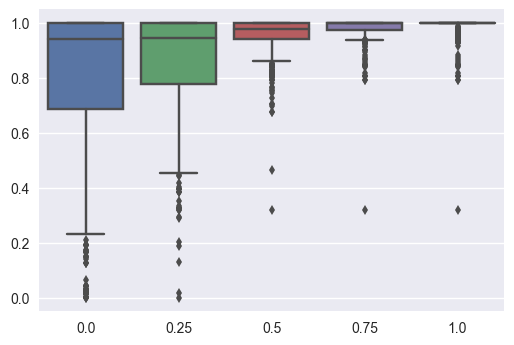

In [14]:
sns.boxplot(data=quantile_table)

In [6]:
node_table

In [9]:
rep_motif_p[51]

array([  4.99806144e-06,   1.86387358e-01,   9.31916796e-01,
         9.31916796e-01,   9.31916796e-01])

In [ ]:
pd.DataFrame(edge_list)